# USA Car Accidents Severity Prediction

# INTRODUCTION

### Motivation
The economic and societal impact of traffic accidents cost U.S. citizens hundreds of billions of dollars every year. And a large part of losses is caused by a small number of serious accidents. Reducing traffic accidents, especially serious accidents, is nevertheless always an important challenge. The proactive approach, one of the two main approaches for dealing with traffic safety problems, focuses on preventing potential unsafe road conditions from occurring in the first place. For the effective implementation of this approach, accident prediction and severity prediciton are critical. If we can identify the patterns of how these serious accidents happen and the key factors, we might be able to implement well-informed actions and better allocate financial and human resources.

### Objectives
The first objective of this project is to recognize key factors affecting the accident severity. The second one is to develop a model that can accurately predict accident severity. To be specific, for a given accident, without any detailed information about itself, like driver attributes or vehicle type, this model is supposed to be able to predict the likelihood of this accident being a severe one. The accident could be the one that just happened and still lack of detailed information, or a potential one predicted by other models. Therefore, with the sophisticated real-time traffic accident prediction solution developed by the creators of the same dataset used in this project, this model might be able to further predict severe accidents in real-time.

### Process
Data cleaning was first performed to detect and handle corrupt or missing records. EDA (Exploratory Data Analysis) and feature engineering were then done over most features. Finally, Logistic regression, Decision Tree, and Random Forest Classifier were used to develop the predictive model.

It is worth noting that the severity in this project is "**an indication of the effect the accident has on traffic**", rather than the injury severity that has already been thoroughly studied by many articles. Another thing is that the final model is dependent on only a small range of data attributes that are easily achievable for all regions in the United States and before the accident really happened.

### Key Findings
* California is the state with the highest number of accidents, then we have Texas and Florida.
* Most of the accidents occured near a traffic signal, expecially where a junction or a crossing was present.
* Distance of the accident is more or less proportional to the severity, and accidents with severity 4 have the longest distance.
* Most frequent cases of the weather condition is clear.
* Days with the most accidents are working days, while in the weekend we have a frequency of at least 2/3 less.
* An accident is much less likely to be severe if it happens near traffic signal while more likely if near junction.

### Dataset Overview
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2020, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 1.5 million accident records in this dataset. Check here to learn more about this dataset.

Link for kaggle dataset: https://www.kaggle.com/sobhanmoosavi/us-accidents



### Table of content
1. [OVERVIEW AND IMPORTING DATA](#1) 
    
    1.1 [Overview](#1.1) 
    
    1.2 [Required  Libraries](#1.2)
    
    <br>    
2. [Exploratory Data Analysis (EDA)](#2)

    2.1 [Number of Accidents per State](#2.1)
    
    2.2 [Most frequent words in the description](#2.2)
    
    2.3 [Most frequent road features](#2.3)
    
    2.4 [Medium distance by severity](#2.4)
    
    2.5 [Weather condition histogram](#2.5)
    
    2.6 [Number of accidents for weekday](#2.6)
    
    <br>    
3. [DATA PREPROCESSING](#3)
    
    3.1 [Feature addition](#3.1)
    
    3.2 [Check correlation between features](#3.2)
    
    3.3 [Feature selection](#3.3)
    
    3.4 [Drop duplicates](#3.4)
    
    3.5 [Handle erroneous and missing values](#3.5)
    
    3.6 [Check features variance](#3.6)
    
    3.7 [Handle unbalanced data](#3.7)
    
    3.8 [Feature scaling](#3.8)
    
    3.9 [Feature encoding](#3.9)
    
    <br>
4. [MODEL](#4)
    
    4.1 [Logistic regression](#4.1)

    4.2 [SVM](#4.2)
    
    4.3 [Decision Tree](#4.3)
    
    4.4 [Random Forest](#4.4)

    4.5 [Navie Bayes](#4.5)

    4.6 [Multi Layer Perceptron](#4.6)



    
    <br>
5. [RESULT](#5)

<a id="1.1"></a>
## 1.1 Overview the dataset
Details about features in the dataset:

**Traffic Attributes (12)**:

* **ID**: This is a unique identifier of the accident record.

* **Source**: Indicates source of the accident report (i.e. the API which reported the accident.).

* **TMC**: A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.

* **Severity**: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

* **Start_Time**: Shows start time of the accident in local time zone.

* **End_Time**: Shows end time of the accident in local time zone.

* **Start_Lat**: Shows latitude in GPS coordinate of the start point.

* **Start_Lng**: Shows longitude in GPS coordinate of the start point.

* **End_Lat**: Shows latitude in GPS coordinate of the end point.

* **End_Lng**: Shows longitude in GPS coordinate of the end point.

* **Distance(mi)**: The length of the road extent affected by the accident.

* **Description**: Shows natural language description of the accident.

**Address Attributes (9)**:

* **Number**: Shows the street number in address field.

* **Street**: Shows the street name in address field.

* **Side**: Shows the relative side of the street (Right/Left) in address field.

* **City**: Shows the city in address field.

* **County**: Shows the county in address field.

* **State**: Shows the state in address field.

* **Zipcode**: Shows the zipcode in address field.

* **Country**: Shows the country in address field.

* **Timezone**: Shows timezone based on the location of the accident (eastern, central, etc.).

**Weather Attributes (11)**:

* **Airport_Code**: Denotes an airport-based weather station which is the closest one to location of the accident.

* **Weather_Timestamp**: Shows the time-stamp of weather observation record (in local time).

* **Temperature(F)**: Shows the temperature (in Fahrenheit).

* **Wind_Chill(F)**: Shows the wind chill (in Fahrenheit).

* **Humidity(%)**: Shows the humidity (in percentage).

* **Pressure(in)**: Shows the air pressure (in inches).

* **Visibility(mi)**: Shows visibility (in miles).

* **Wind_Direction**: Shows wind direction.

* **Wind_Speed(mph)**: Shows wind speed (in miles per hour).

* **Precipitation(in)**: Shows precipitation amount in inches, if there is any.

* **Weather_Condition**: Shows the weather condition (rain, snow, thunderstorm, fog, etc.).

**POI Attributes (13)**:

* **Amenity**: A Point-Of-Interest (POI) annotation which indicates presence of amenity in a nearby location.

* **Bump**: A POI annotation which indicates presence of speed bump or hump in a nearby location.

* **Crossing**: A POI annotation which indicates presence of crossing in a nearby location.

* **Give_Way**: A POI annotation which indicates presence of give_way sign in a nearby location.

* **Junction**: A POI annotation which indicates presence of junction in a nearby location.

* **No_Exit**: A POI annotation which indicates presence of no_exit sign in a nearby location.

* **Railway**: A POI annotation which indicates presence of railway in a nearby location.

* **Roundabout**: A POI annotation which indicates presence of roundabout in a nearby location.

* **Station**: A POI annotation which indicates presence of station (bus, train, etc.) in a nearby location.

* **Stop**: A POI annotation which indicates presence of stop sign in a nearby location.

* **Traffic_Calming**: A POI annotation which indicates presence of traffic_calming means in a nearby location.

* **Traffic_Signal**: A POI annotation which indicates presence of traffic_signal in a nearby location.

* **Turning_Loop**: A POI annotation which indicates presence of turning_loop in a nearby location.

**Period-of-Day (4)**:

* **Sunrise_Sunset**: Shows the period of day (i.e. day or night) based on sunrise/sunset.

* **Civil_Twilight**: Shows the period of day (i.e. day or night) based on civil twilight.

* **Nautical_Twilight**: Shows the period of day (i.e. day or night) based on nautical twilight.

* **Astronomical_Twilight**: Shows the period of day (i.e. day or night) based on astronomical twilight.

<a id="1.2"></a>
# 1.2 Required libraries

In [ ]:
!pip install category_encoders
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import category_encoders as ce


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize


import plotly.graph_objects as go
from nltk.corpus import stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.1 MB/s 


# Dataset import

In the first place we are going to import the dataset using pandas.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/thesis/US_Accidents_Dec21_updated.csv")
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


<a id="2"></a>
# 2 Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
In this first part of this notebook we are going to do an EDA of the dataset.

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year,Month,Weekday,Day,Hour,Minute
count,98312.00000,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000,98312.000000
mean,2.50000,0.500153,0.511719,0.004827,0.632482,0.606599,0.860935,0.102502,0.015638,0.000812,0.652669,0.478542,0.447670,0.504565,0.558600,0.504234
std,1.11804,0.208826,0.304729,0.014613,0.129836,0.255096,0.106555,0.033110,0.010479,0.008669,0.300309,0.293919,0.308418,0.290895,0.249306,0.293272
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.75000,0.364208,0.216494,0.000000,0.547945,0.418367,0.848375,0.110518,0.009653,0.000000,0.400000,0.272727,0.166667,0.266667,0.347826,0.254237
50%,2.50000,0.527904,0.639938,0.001208,0.643836,0.632653,0.898917,0.110518,0.014289,0.000000,0.800000,0.454545,0.500000,0.500000,0.608696,0.508475
75%,3.25000,0.659059,0.775239,0.004567,0.732877,0.826531,0.916065,0.110518,0.020077,0.000713,0.800000,0.727273,0.666667,0.766667,0.739130,0.762712
max,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Insights

1) This tells that majority of accidents have severity ~2 means not much higher 
impact on traffic.

2)In approx 75% cases no precipitation was recorded so this could mean rain is not the reason for accidents.

3)On an avg accidents happen even while the visibility is ~9 miles so this could mean that visibility is not a reason.

4)Average length of the road extent affected by the accident is 7 miles

<a id="2.1"></a>
## 2.1 Number of Accidents per State

With the following code we are going to create a map of each state of the US with a color based on the number of accidents present in the dataset for that state.

In [ ]:
state_counts = df["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states", colorscale="turbo"))
fig.update_layout(title_text="Number of US Accidents for each State", geo_scope="usa")
fig.show()

Text(0.5, 1.0, 'Cities in US reported most accident cases')

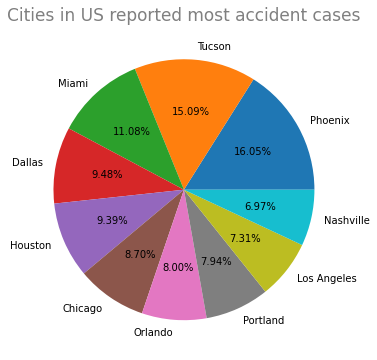

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(top_cities,labels=top_cities.index,autopct='%.2f%%')
plt.title("Cities in US reported most accident cases",size=17,color="grey")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



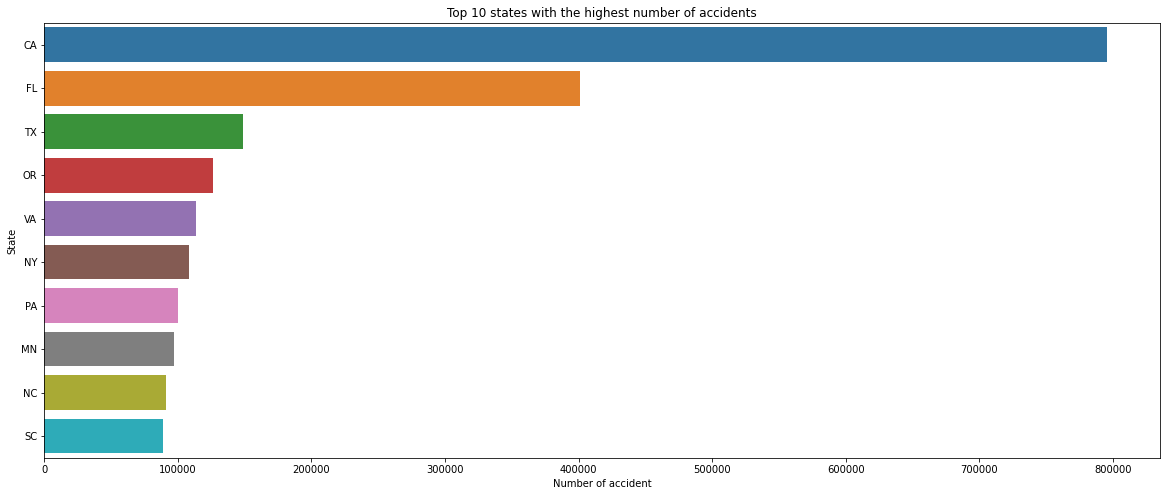

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("Top 10 states with the highest number of accidents")
sns.barplot(state_counts[:10].values, state_counts[:10].index, orient="h")
plt.xlabel("Number of accident")
plt.ylabel("State")
plt.show()

As we can see from the map and the plot above California is the state with the highest number of accidents, then we have Texas and Florida.

<a id="2.2"></a>
## 2.2 Most frequent words in the description of an accident with severity 4

We are going to compute the most frequent words in the description column of the accidents with a value of severity equal to 4, using some stopwords from the english language.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



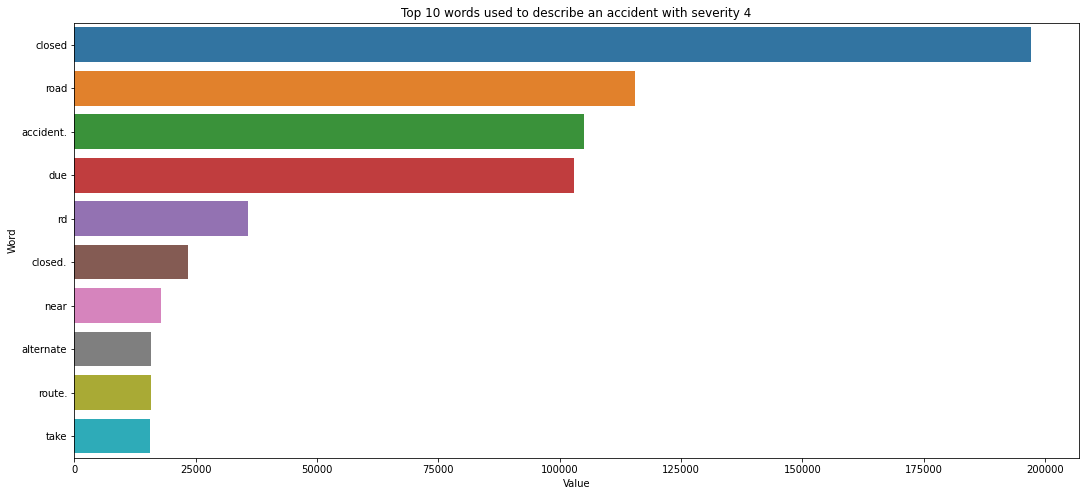

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words("english") + ["-"]

df_s4_desc = df[df["Severity"] == 4]["Description"]
# Split the description
df_words = df_s4_desc.str.lower().str.split(expand=True).stack()

# If the word is not in the stopwords list
counts = df_words[~df_words.isin(stop)].value_counts()[:10]

plt.figure(figsize=(18, 8))
plt.title("Top 10 words used to describe an accident with severity 4")
sns.barplot(counts.values, counts.index, orient="h")
plt.xlabel("Value")
plt.ylabel("Word")
plt.show()

We can see that the most used word in the description is *closed*. Subsequent words are *accident*, *due* and *road*.

<a id="2.3"></a>
## 2.3 Most frequent road features

Now we are going to analyze which are the most frequent road features in accidents.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



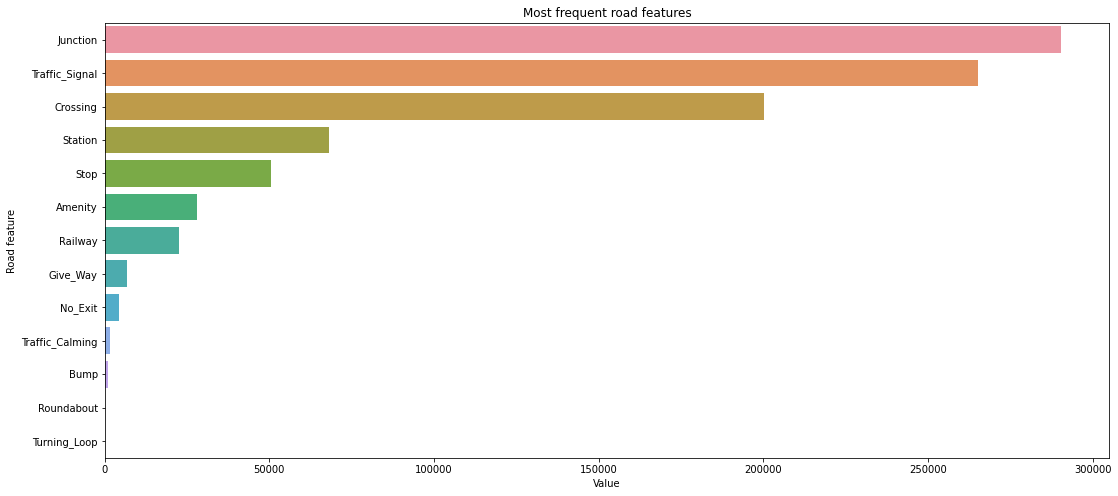

In [ ]:
road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
data = df[road_features].sum().sort_values(ascending=False)

plt.figure(figsize=(18, 8))
plt.title("Most frequent road features")
sns.barplot(data.values, data.index, orient="h")
plt.xlabel("Value")
plt.ylabel("Road feature")
plt.show()

As we can see, most of the accidents occured near a traffic signal, expecially where a junction or a crossing was present. 

The fourth most common road feature, instead, was the presence of a nearby station, probably because of the high presence of vehicles.

<a id="2.4"></a>
## 2.4 Medium distance by severity

Let's now analyze the medium distance of an accident based on its severity.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



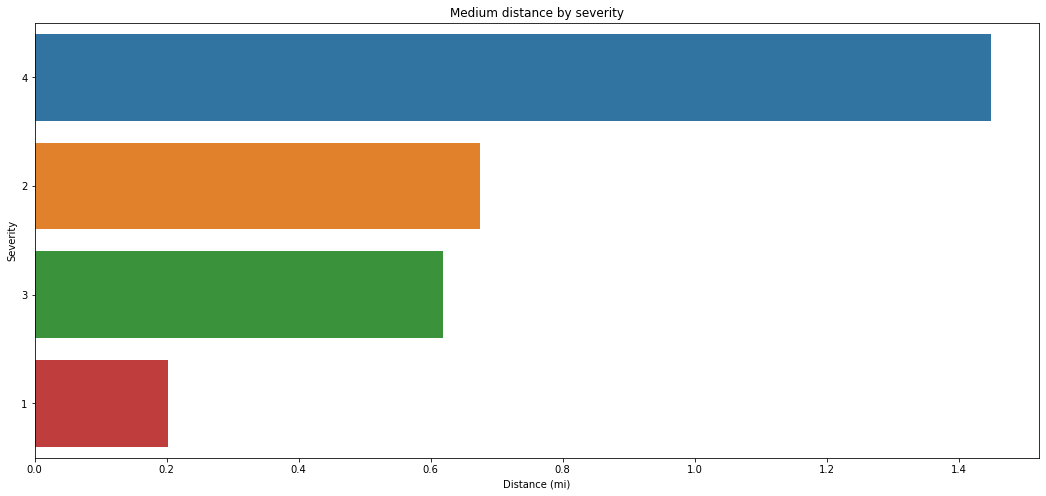

In [ ]:
severity_distance = df.groupby("Severity").mean()["Distance(mi)"].sort_values(ascending=False)

plt.figure(figsize=(18, 8))
plt.title("Medium distance by severity")
sns.barplot(severity_distance.values, severity_distance.index, orient="h", order=severity_distance.index)
plt.xlabel("Distance (mi)")
plt.show()

In this graph we can see that the distance of the accident is more or less proportional to the severity, and in fact accidents with severity 4 have the longest distance.

<a id="2.5"></a>
## 2.5 Weather condition histogram

With the following code we can plot the histogram of the weather condition column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



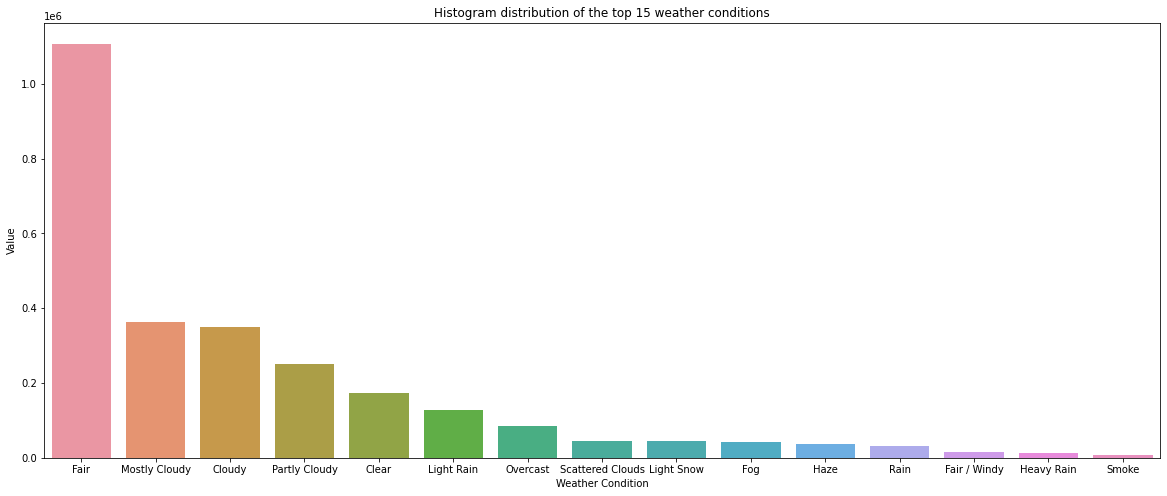

In [ ]:
counts = df["Weather_Condition"].value_counts()[:15]
plt.figure(figsize=(20, 8))
plt.title("Histogram distribution of the top 15 weather conditions")
sns.barplot(counts.index, counts.values)
plt.xlabel("Weather Condition")
plt.ylabel("Value")
plt.show()

In most frequent cases the weather condition is clear.

<a id="2.6"></a>
## 2.6 Number of accidents for weekday

Here is a plot of the number of accidents appened in each weekday.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



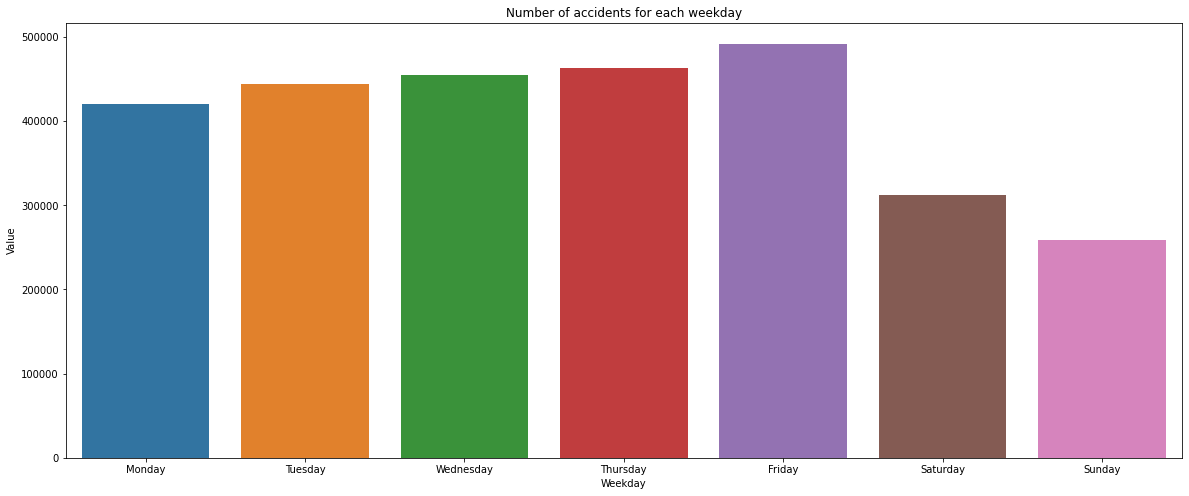

In [ ]:
counts = pd.to_datetime(df['Start_Time']).dt.day_name().value_counts()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(20, 8))
plt.title("Number of accidents for each weekday")
sns.barplot(counts.index, counts.values, order=weekdays)
plt.xlabel("Weekday")
plt.ylabel("Value")
plt.show()

As we can see from the plot above, the days with the most accidents are working days, while in the weekend we have a frequency of at least 2/3 less. This may be due to the fact that during the weekend there are fewer cars on the road.

<a id="3"></a>
# 3 Data Preprocessing

Data preprocessing involves transforming raw data to well-formed data sets so that data mining analytics can be applied. Raw data is often incomplete and has inconsistent formatting. The adequacy or inadequacy of data preparation has a direct correlation with the success of any project that involve data analyics. In this phase we are going to process the dataset in order to make it usable for the machine learning models.

In [ ]:
X = df
X.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


<a id="3.1"></a>
## 3.1 Feature addition

We decided to decompose the Start_Time feature in year, month, day, weekday, hour and minute, in order to feed them to the models.

In [ ]:
# Cast Start_Time to datetime
X["Start_Time"] = pd.to_datetime(X["Start_Time"])

# Extract year, month, weekday and day
X["Year"] = X["Start_Time"].dt.year
X["Month"] = X["Start_Time"].dt.month
X["Weekday"] = X["Start_Time"].dt.weekday
X["Day"] = X["Start_Time"].dt.day

# Extract hour and minute
X["Hour"] = X["Start_Time"].dt.hour
X["Minute"] = X["Start_Time"].dt.minute

X.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,Night,Night,Night,Night,2016,2,0,8,0,37
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,Night,Night,Night,Night,2016,2,0,8,5,56
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,Night,Night,Night,Day,2016,2,0,8,6,15
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,Night,Night,Day,Day,2016,2,0,8,6,51
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,Day,Day,Day,Day,2016,2,0,8,7,53


<a id="3.2"></a>
## 3.2 Check correlation between features


In the next block is presented the correlation matrix between all the possible features, in the form of an heatmap. 

With that we can observe the correlation between the different features of the dataset, in order to check if some features are highly correlated and remove one of them.

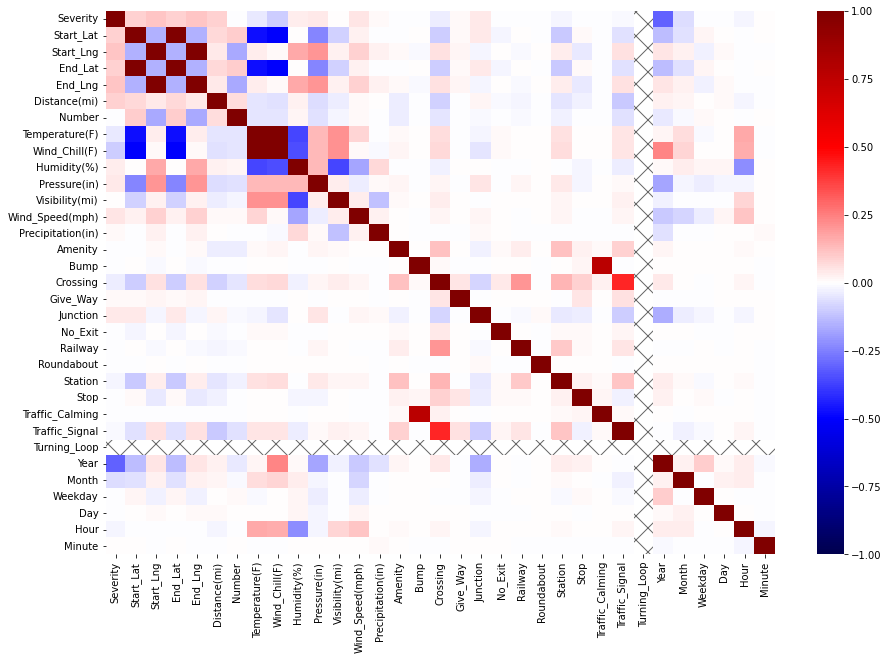

In [ ]:
corr_matrix = X.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="seismic")
plt.gca().patch.set(hatch="X", edgecolor="#666")
plt.show()

From the matrix we can see that the start and end GPS coordinates of the accidents are highly correlated. 

In fact, from the medium distance shown before, the end of the accident is usually close to the start, so we can consider just one of them for the machine learning models.

Moreover, the wind chill (temperature) is directly proportional to the temperature, so we can also drop one of them.

We can also see that the presence of a traffic signal is slightly correlated to the severity of an accident meaning that maybe traffic lights can help the traffic flow when an accident occurs.

From the matrix we can also note that we couldn't compute the covariance with Turning_Loop, and that's because it's always False.

<a id="3.3"></a>
## 3.3 Feature selection

Here is the process of feature selection, in order to select the best features from which our models can learn.

From the observations made with the correlation matrix, we are going to drop the following features:
- End_Lat and End_Lng
- Wind Chill

Moreover, we are going to drop the following features:
- ID, Source: since they don't carry any information for the severity
- TMC: because it could already contains information about the accident severity
- Start_Time: because it was decomposed by the time features added before (day, month, weekday)
- End_Time: beause we cannot know in advance when the traffic flow will become regular again
- Description: most description only report the name of the road of the accident, and so we decided to omit this feature for semplicity
- Number, Street, County, State, Zipcode, Country: because we just focus on the City where the accident happened
- Timezone, Airport_Code, Weather_Timestamp: because they are not useful for our task
- Turning_Loop: since it's always False
- Sunrise_Sunset, Nautical_Twilight, Astronomical_Twilight: because they are redundant

In [ ]:
features_to_drop = ["ID", "Start_Time", "End_Time", "End_Lat", "End_Lng", "Description", "Number", "Street", "County", "State", "Zipcode", "Country", "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Chill(F)", "Turning_Loop", "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight"]
X = X.drop(features_to_drop, axis=1)
X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,3,40.108910,-83.092860,3.230,R,Dublin,42.1,58.0,29.76,10.0,...,False,False,False,Night,2016,2,0,8,0,37
1,2,39.865420,-84.062800,0.747,R,Dayton,36.9,91.0,29.68,10.0,...,False,False,False,Night,2016,2,0,8,5,56
2,2,39.102660,-84.524680,0.055,R,Cincinnati,36.0,97.0,29.70,10.0,...,False,False,False,Night,2016,2,0,8,6,15
3,2,41.062130,-81.537840,0.123,R,Akron,39.0,55.0,29.65,10.0,...,False,False,False,Night,2016,2,0,8,6,51
4,3,39.172393,-84.492792,0.500,R,Cincinnati,37.0,93.0,29.69,10.0,...,False,False,False,Day,2016,2,0,8,7,53


<a id="3.4"></a>
## 3.4 Drop duplicates

In this section we are going to check if there are some duplicates in the dataset.

In [ ]:
print("Number of rows:", len(X.index))
X.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(X.index))

Number of rows: 2557939
Number of rows after drop of duplicates: 2557939


<a id="3.5"></a>
## 3.5 Handle erroneous and missing values

Here we are going to clean the dataset from erroneous or missing values.

Let's start looking to the Side column:

In [ ]:
X["Side"].value_counts()

R    2129910
L     428029
Name: Side, dtype: int64

We can see that there is one record without side, so we can drop it.

In [ ]:
X = X[X["Side"] != " "]
X["Side"].value_counts()

R    2129910
L     428029
Name: Side, dtype: int64

Let's instead analyze Pressure and Visibility:

In [ ]:
X[["Pressure(in)", "Visibility(mi)"]].describe().round(2)

,Pressure(in),Visibility(mi)
count,2557939.00,2557939.00
mean,29.48,9.11
std,1.03,2.72
min,0.02,0.06
25%,29.32,10.00
50%,29.82,10.00
75%,30.01,10.00
max,58.90,140.00


 We can see that the minimum value is 0, meaning that some records are missing them and replaced them by putting zeros.
 For this reason, we are going to drop the records with missing values for these two columns.

In [ ]:
X = X[X["Pressure(in)"] != 0]
X = X[X["Visibility(mi)"] != 0]
X[["Pressure(in)", "Visibility(mi)"]].describe().round(2)

,Pressure(in),Visibility(mi)
count,2557939.00,2557939.00
mean,29.48,9.11
std,1.03,2.72
min,0.02,0.06
25%,29.32,10.00
50%,29.82,10.00
75%,30.01,10.00
max,58.90,140.00


If we analyze the weather conditions, we can see that there are lots of them, so it's better to reduce the number of unique conditions.

In [ ]:
unique_weather = X["Weather_Condition"].unique()

print(len(unique_weather))
print(unique_weather)

11
['Rain' 'Cloudy' 'Snow' 'Clear' 'Fog' 'Thunderstorm' 'Smoke' 'Windy'
 'Hail' 'Sand' 'Tornado']


To do so, we are going to replace them with a more generic description:

In [ ]:
X.loc[X["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
X.loc[X["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
X.loc[X["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
X.loc[X["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
X.loc[X["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
X.loc[X["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
X.loc[X["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
X.loc[X["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
X.loc[X["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
X.loc[X["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
X.loc[X["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

print(X["Weather_Condition"].unique())

['Rain' 'Cloudy' 'Snow' 'Clear' 'Fog' 'Thunderstorm' 'Smoke' 'Windy'
 'Hail' 'Sand' 'Tornado']


Let's check also the Wind_Direction field:

In [ ]:
X["Wind_Direction"].unique()

array(['SW', 'Calm', 'NW', 'W', 'S', 'N', 'SE', 'E', 'Variable', 'NE'],
      dtype=object)

As we can see, we can group the values like we did with Weather_Condition:

In [ ]:
X.loc[X["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
X.loc[X["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
X.loc[X["Wind_Direction"] == "East", "Wind_Direction"] = "E"
X.loc[X["Wind_Direction"] == "North", "Wind_Direction"] = "N"
X.loc[X["Wind_Direction"] == "South", "Wind_Direction"] = "S"
X.loc[X["Wind_Direction"] == "West", "Wind_Direction"] = "W"

X["Wind_Direction"] = X["Wind_Direction"].map(lambda x : x if len(x) != 3 else x[1:], na_action="ignore")

X["Wind_Direction"].unique()

array(['SW', 'Calm', 'NW', 'W', 'S', 'N', 'SE', 'E', 'Variable', 'NE'],
      dtype=object)

Next, let's analyze the missing values:

In [ ]:
X.isna().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Side                 0
City                 0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Civil_Twilight       0
Year                 0
Month                0
Weekday              0
Day                  0
Hour                 0
Minute               0
dtype: int64

Since a lot of records do not have informations about Precipitation, we are going to drop the feature.

For numerical features we are going to fill the missing features with the mean, while for categorical features like City, Wind_Direction, Weather_Condition and Civil_Twilight, we are going to delete the records with missing informations.

In [ ]:
features_to_fill = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
X[features_to_fill] = X[features_to_fill].fillna(X[features_to_fill].mean())

X.dropna(inplace=True)

X.isna().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Side                 0
City                 0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Civil_Twilight       0
Year                 0
Month                0
Weekday              0
Day                  0
Hour                 0
Minute               0
dtype: int64

<a id="3.6"></a>
## 3.6 Check features variance

In this section we are going to check the variance for each feature in order to remove features with a very low variance beacuse they can't help to discriminate instances.

In [ ]:
X.describe().round(2)

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year,Month,Weekday,Day,Hour,Minute
count,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00,2557939.00
mean,2.15,36.29,-97.36,0.70,61.75,64.37,29.48,9.11,7.40,0.01,2019.92,7.44,2.75,16.06,12.78,29.69
std,0.49,5.33,18.28,1.56,18.59,22.84,1.03,2.72,5.45,0.08,1.47,3.64,1.86,8.72,5.84,17.26
min,1.00,24.57,-124.55,0.00,-89.00,1.00,0.02,0.06,0.00,0.00,2016.00,1.00,0.00,1.00,0.00,0.00
25%,2.00,33.47,-118.06,0.05,50.00,48.00,29.32,10.00,3.50,0.00,2019.00,4.00,1.00,9.00,8.00,15.00
50%,2.00,36.08,-93.00,0.25,63.00,67.00,29.82,10.00,7.00,0.00,2021.00,8.00,3.00,16.00,14.00,30.00
75%,2.00,40.17,-80.44,0.77,76.00,83.00,30.01,10.00,10.00,0.01,2021.00,11.00,4.00,23.00,17.00,45.00
max,4.00,49.00,-67.11,155.19,196.00,100.00,58.90,140.00,1087.00,24.00,2021.00,12.00,6.00,31.00,23.00,59.00


Even though Precipitation and Pressure have a small variance, there is no need to drop them since they usually have small increments.

<a id="3.7"></a>
## 3.7 Handle unbalanced data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



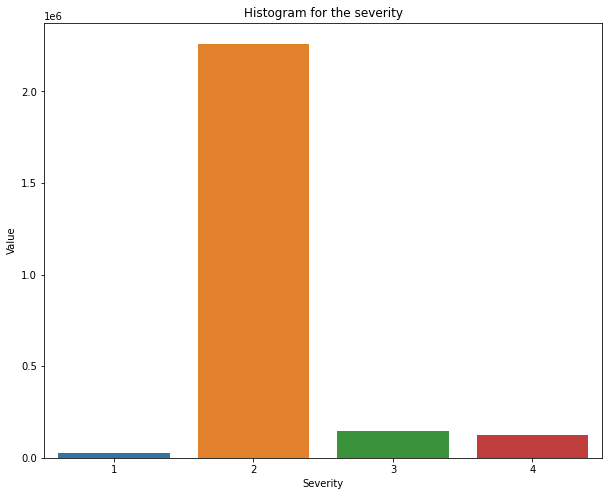

In [ ]:
severity_counts = X["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

The severity attribute as we can see from the previous plot is highly unbalanced, the number of accident with the severity 1 is very small instead the number of accident with severity 2 is much higher.

So, in order to balance the data we are going to undersample all the categories to the number of records of the minority category, in this case the severity 1.
We thought this was a good choice since this leaves us with a good amount of records for each category, which is ~25k records

In [ ]:
size = len(X[X["Severity"]==1].index)
df = pd.DataFrame()
for i in range(1,5):
    S = X[X["Severity"]==i]
    df = df.append(S.sample(size, random_state=42))
X = df

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



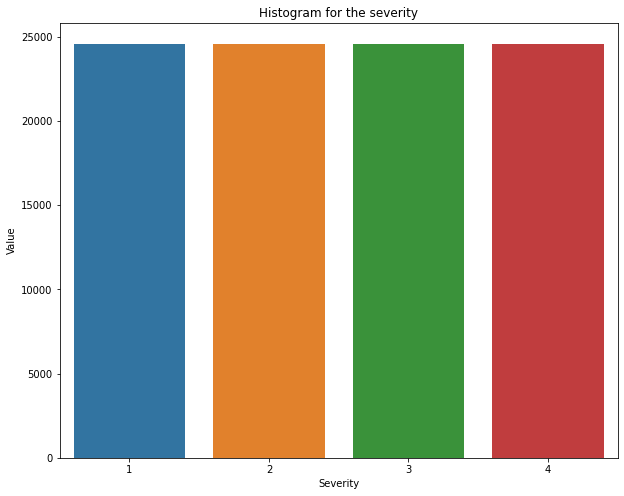

In [ ]:
severity_counts = X["Severity"].value_counts()
plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

<a id="3.8"></a>
## 3.8 Feature scaling

In this section we are going to scale and normalize the features.

To improve the performance of our models, we normalized the values of the continuous features.

In [ ]:
scaler = MinMaxScaler()
features = ['Temperature(F)','Distance(mi)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Start_Lng','Start_Lat','Year', 'Month','Weekday','Day','Hour','Minute']
X[features] = scaler.fit_transform(X[features])
X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
2089472,1,0.364652,0.216803,0.0,L,Phoenix,0.945205,0.061224,0.782491,0.110518,...,True,False,False,Day,0.8,0.454545,0.333333,0.066667,0.739130,0.491525
2275714,1,0.498747,0.082484,0.0,R,Fresno,0.643836,0.551020,0.884477,0.110518,...,False,False,False,Night,0.8,0.272727,0.666667,0.766667,0.086957,0.305085
2251846,1,0.052845,0.778442,0.0,R,Miami,0.767123,0.663265,0.911552,0.110518,...,False,False,False,Day,0.8,0.272727,0.833333,0.333333,0.565217,0.949153
2268650,1,0.474868,0.662747,0.0,L,Nashville,0.698630,0.234694,0.851986,0.110518,...,False,False,False,Day,0.8,0.272727,0.166667,0.666667,0.652174,0.762712
2266782,1,0.475781,0.663503,0.0,R,Nashville,0.691781,0.295918,0.838448,0.110518,...,False,False,False,Day,0.8,0.272727,0.000000,0.633333,0.652174,0.813559


<a id="3.9"></a>
## 3.9 Feature encoding

Finally, in this section we are going to encode the categorical features.

In [ ]:
categorical_features = set(["Side", "City", "Wind_Direction", "Weather_Condition", "Civil_Twilight"])

for cat in categorical_features:
    X[cat] = X[cat].astype("category")

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98312 entries, 2089472 to 2697462
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Severity           98312 non-null  int64   
 1   Start_Lat          98312 non-null  float64 
 2   Start_Lng          98312 non-null  float64 
 3   Distance(mi)       98312 non-null  float64 
 4   Side               98312 non-null  category
 5   City               98312 non-null  category
 6   Temperature(F)     98312 non-null  float64 
 7   Humidity(%)        98312 non-null  float64 
 8   Pressure(in)       98312 non-null  float64 
 9   Visibility(mi)     98312 non-null  float64 
 10  Wind_Direction     98312 non-null  category
 11  Wind_Speed(mph)    98312 non-null  float64 
 12  Precipitation(in)  98312 non-null  float64 
 13  Weather_Condition  98312 non-null  category
 14  Amenity            98312 non-null  bool    
 15  Bump               98312 non-null  bool    
 

First of all, we show the number of unique classes for each categorical feature.

In [ ]:
print("Unique classes for each categorical feature:")
for cat in categorical_features:
    print("{:15s}".format(cat), "\t", len(X[cat].unique()))

Unique classes for each categorical feature:
Side            	 2
Civil_Twilight  	 2
Weather_Condition 	 10
City            	 6839
Wind_Direction  	 10


Let's first encode the boolean values in a numerical form.

In [ ]:
X = X.replace([True, False], [1, 0])

X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
2089472,1,0.364652,0.216803,0.0,L,Phoenix,0.945205,0.061224,0.782491,0.110518,...,1,0,0,Day,0.8,0.454545,0.333333,0.066667,0.739130,0.491525
2275714,1,0.498747,0.082484,0.0,R,Fresno,0.643836,0.551020,0.884477,0.110518,...,0,0,0,Night,0.8,0.272727,0.666667,0.766667,0.086957,0.305085
2251846,1,0.052845,0.778442,0.0,R,Miami,0.767123,0.663265,0.911552,0.110518,...,0,0,0,Day,0.8,0.272727,0.833333,0.333333,0.565217,0.949153
2268650,1,0.474868,0.662747,0.0,L,Nashville,0.698630,0.234694,0.851986,0.110518,...,0,0,0,Day,0.8,0.272727,0.166667,0.666667,0.652174,0.762712
2266782,1,0.475781,0.663503,0.0,R,Nashville,0.691781,0.295918,0.838448,0.110518,...,0,0,0,Day,0.8,0.272727,0.000000,0.633333,0.652174,0.813559


Now we can encode the categorical features using the method `get_dummies()` which converts the features with the one-hot encoding.

In [ ]:
# Remove city because it will be encoded later
onehot_cols = categorical_features - set(["City"])

X = pd.get_dummies(X, columns=onehot_cols, drop_first=True)

X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Weather_Condition_Windy,Wind_Direction_E,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_Variable,Wind_Direction_W
2089472,1,0.364652,0.216803,0.0,Phoenix,0.945205,0.061224,0.782491,0.110518,0.017375,...,0,0,0,0,0,0,0,1,0,0
2275714,1,0.498747,0.082484,0.0,Fresno,0.643836,0.551020,0.884477,0.110518,0.013514,...,0,0,0,0,1,0,0,0,0,0
2251846,1,0.052845,0.778442,0.0,Miami,0.767123,0.663265,0.911552,0.110518,0.027027,...,0,1,0,0,0,0,0,0,0,0
2268650,1,0.474868,0.662747,0.0,Nashville,0.698630,0.234694,0.851986,0.110518,0.030888,...,0,0,0,0,1,0,0,0,0,0
2266782,1,0.475781,0.663503,0.0,Nashville,0.691781,0.295918,0.838448,0.110518,0.019305,...,0,0,0,0,1,0,0,0,0,0


Now, remains only to encode the *City* feature. In order to, reduce the usage of memory and the number of features we used the `BinaryEncoder` included in the library category_encoders.

In [ ]:
binary_encoder = ce.binary.BinaryEncoder()

city_binary_enc = binary_encoder.fit_transform(X["City"])
city_binary_enc

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12
2089472,0,0,0,0,0,0,0,0,0,0,0,0,1
2275714,0,0,0,0,0,0,0,0,0,0,0,1,0
2251846,0,0,0,0,0,0,0,0,0,0,0,1,1
2268650,0,0,0,0,0,0,0,0,0,0,1,0,0
2266782,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762524,0,0,1,0,1,0,0,0,1,1,0,1,1
1075614,0,1,1,0,1,1,0,1,0,0,0,1,1
978159,0,0,0,0,0,0,0,1,1,0,0,1,0
1585201,1,0,1,1,1,1,0,0,0,1,0,0,0


Finally, we can merge the two dataframes and obtain the final dataframe X with the categorical features encoded.

In [ ]:
X = pd.concat([X, city_binary_enc], axis=1).drop("City", axis=1)

X.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12
2089472,1,0.364652,0.216803,0.0,0.945205,0.061224,0.782491,0.110518,0.017375,0.0,...,0,0,0,0,0,0,0,0,0,1
2275714,1,0.498747,0.082484,0.0,0.643836,0.551020,0.884477,0.110518,0.013514,0.0,...,0,0,0,0,0,0,0,0,1,0
2251846,1,0.052845,0.778442,0.0,0.767123,0.663265,0.911552,0.110518,0.027027,0.0,...,0,0,0,0,0,0,0,0,1,1
2268650,1,0.474868,0.662747,0.0,0.698630,0.234694,0.851986,0.110518,0.030888,0.0,...,0,0,0,0,0,0,0,1,0,0
2266782,1,0.475781,0.663503,0.0,0.691781,0.295918,0.838448,0.110518,0.019305,0.0,...,0,0,0,0,0,0,0,1,0,0


<a id="4"></a>
# 4 Model

In this section we will test sevaral models to identify the best one for this task.

In particular, we will use the following models:
- Logistic Regression;
- Decision Tree
- Random Forest
- SVM
- Navie Bayes
- Multi layer perceptron

Moreover, we are going to search the best hyperparameters to produce the best results for each model. In the end, we will show the performance of each model using different metrics: precision, recall, accuracy.

In [ ]:
# Metrics dictionary
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

In [ ]:
# Train/Validation - Test split
X, X_test = train_test_split(X, test_size=.2, random_state=42)
print(X.shape, X_test.shape)

(78649, 61) (19663, 61)


<a id="4.1"></a>
## 4.1 Logistic Regression

In [ ]:
sample = X
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(58986, 60) (58986,)
(19663, 60) (19663,)


In [ ]:
lr = LogisticRegression(random_state=42, n_jobs=-1)
params = {"solver": ["newton-cg", "sag", "saga"]}
grid = GridSearchCV(lr, params, n_jobs=-1, verbose=5)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters scores:
{'solver': 'sag'}
Train score: 0.641677686230631
Validation score: 0.6450185627828917


In [ ]:
print("Default scores:")
lr.fit(X_train, y_train)
print("Train score:", lr.score(X_train, y_train))
print("Validation score:", lr.score(X_validate, y_validate))

Default scores:
Train score: 0.6374054860475367
Validation score: 0.6396785841428063


In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,18.523209,2.120456,0.010876,0.000850,newton-cg,{'solver': 'newton-cg'},0.634514,0.638976,0.641095,0.637535,0.646181,0.639660,0.003900,2
1,5.954005,0.723685,0.010400,0.000739,sag,{'solver': 'sag'},0.634769,0.639146,0.641180,0.637535,0.646181,0.639762,0.003834,1
2,10.261920,1.004517,0.009550,0.000892,saga,{'solver': 'saga'},0.634430,0.638976,0.641095,0.637535,0.646181,0.639643,0.003922,3


In [ ]:
y_pred = lr.predict(X_validate)

accuracy["Logistic Regression"] = accuracy_score(y_validate, y_pred)
f1["Logistic Regression"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, lr.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           1       0.70      0.87      0.78     14788
           2       0.66      0.66      0.66     14672
           3       0.56      0.56      0.56     14792
           4       0.61      0.45      0.52     14734

    accuracy                           0.64     58986
   macro avg       0.63      0.64      0.63     58986
weighted avg       0.63      0.64      0.63     58986

              precision    recall  f1-score   support

           1       0.70      0.88      0.78      4884
           2       0.67      0.66      0.67      4944
           3       0.56      0.56      0.56      4889
           4       0.62      0.46      0.53      4946

    accuracy                           0.64     19663
   macro avg       0.63      0.64      0.63     19663
weighted avg       0.63      0.64      0.63     19663



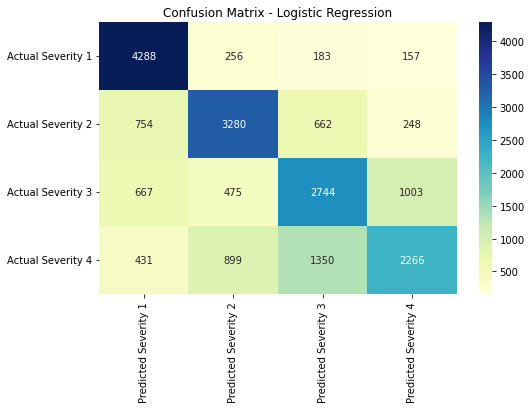

In [ ]:
y_pred = lr.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

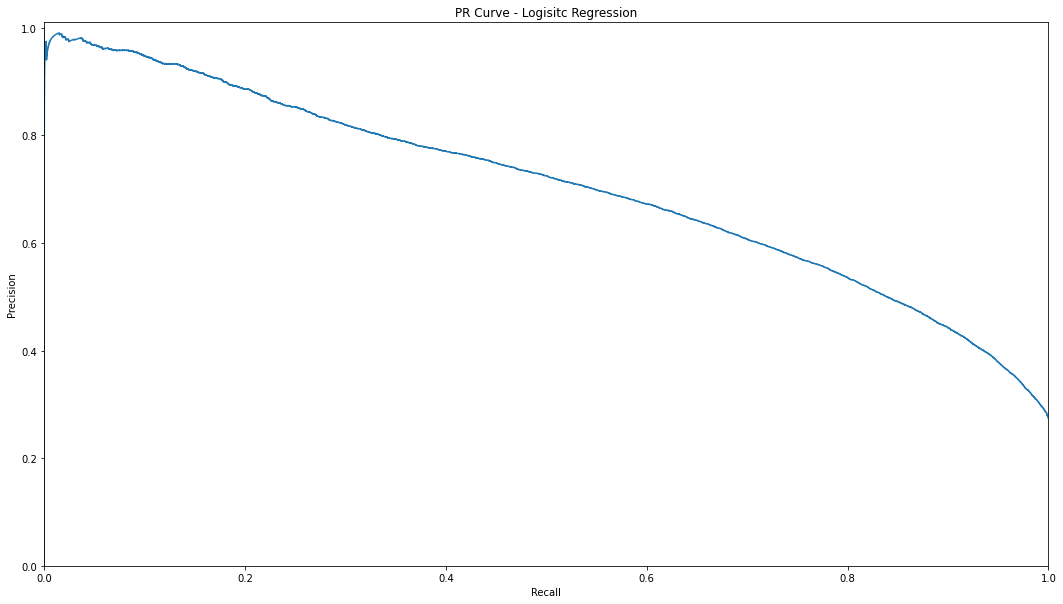

In [ ]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = lr.predict_proba(X_validate)

precision["Logistic Regression"], recall["Logistic Regression"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Logistic Regression"], tpr["Logistic Regression"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Logistic Regression"], precision["Logistic Regression"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Logisitc Regression")
plt.show()

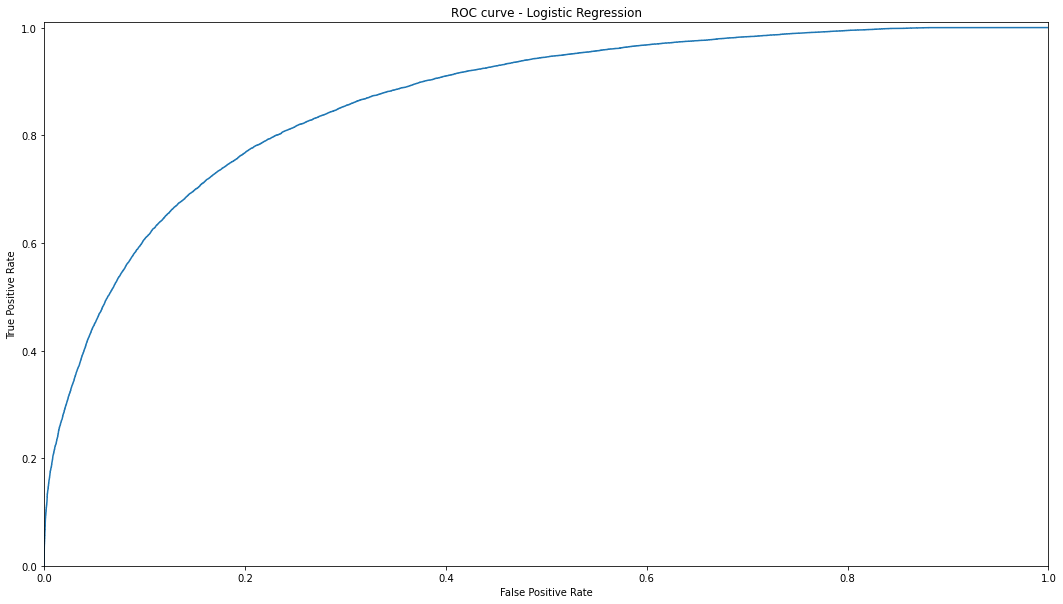

In [ ]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Logistic Regression"], tpr["Logistic Regression"], where="post")

plt.title("ROC curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

<a id="4.2"></a>
## 4.2 SVM

In [ ]:
from sklearn import svm
parameters = [{"kernel": ["linear", "rbf", "sigmoid"], "C": [.2, .5, .8, 1.]}, {"kernel": ["poly"], "C": [.2, .5, .8, 1.], "degree": [2, 3, 4]}]
svc = svm.SVC(verbose=5, random_state=42)
grid = GridSearchCV(svc, parameters, verbose=5, n_jobs=-1)

sample = X.sample(5_000, random_state=42)
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)
grid.fit(X_sample, y_sample)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_sample, y_sample))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LibSVM]Best parameters scores:
{'C': 0.8, 'kernel': 'linear'}
Train score: 0.6628


In [ ]:
print("Default scores:")
svc.fit(X_sample, y_sample)
print("Train score:", svc.score(X_sample, y_sample))

Default scores:
[LibSVM]Train score: 0.7416


In [ ]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,1.943808,0.035073,0.224664,0.004518,0.8,linear,NaN,"{'C': 0.8, 'kernel': 'linear'}",0.654,0.651,0.652,0.653,0.650,0.6520,0.001414,1
9,2.004399,0.090403,0.237445,0.010586,1.0,linear,NaN,"{'C': 1.0, 'kernel': 'linear'}",0.655,0.650,0.647,0.652,0.646,0.6500,0.003286,2
3,1.599820,0.066522,0.222491,0.009400,0.5,linear,NaN,"{'C': 0.5, 'kernel': 'linear'}",0.650,0.649,0.653,0.652,0.645,0.6498,0.002786,3
18,1.578116,0.028261,0.257703,0.006886,0.8,poly,2,"{'C': 0.8, 'degree': 2, 'kernel': 'poly'}",0.647,0.639,0.652,0.654,0.653,0.6490,0.005550,4
21,1.607176,0.018912,0.246968,0.004033,1.0,poly,2,"{'C': 1.0, 'degree': 2, 'kernel': 'poly'}",0.644,0.639,0.650,0.655,0.657,0.6490,0.006723,4
10,2.240967,0.022917,0.655509,0.023362,1.0,rbf,NaN,"{'C': 1.0, 'kernel': 'rbf'}",0.641,0.638,0.655,0.654,0.653,0.6482,0.007194,6
15,1.564964,0.019350,0.259120,0.010242,0.5,poly,2,"{'C': 0.5, 'degree': 2, 'kernel': 'poly'}",0.644,0.639,0.648,0.657,0.646,0.6468,0.005913,7
16,1.705103,0.010746,0.258316,0.004473,0.5,poly,3,"{'C': 0.5, 'degree': 3, 'kernel': 'poly'}",0.646,0.635,0.652,0.650,0.651,0.6468,0.006242,7
0,1.451254,0.053520,0.220753,0.003223,0.2,linear,NaN,"{'C': 0.2, 'kernel': 'linear'}",0.650,0.643,0.651,0.649,0.640,0.6466,0.004317,9
19,1.762219,0.028945,0.266843,0.008663,0.8,poly,3,"{'C': 0.8, 'degree': 3, 'kernel': 'poly'}",0.645,0.635,0.650,0.649,0.654,0.6466,0.006468,9


In [ ]:
sample = X.sample(10_000, random_state=42)
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, test_size=.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(8000, 60) (8000,)
(2000, 60) (2000,)


In [ ]:
svc = svm.SVC(**grid.best_params_, random_state=42)
svc.fit(X_train, y_train)

print("Train score:", svc.score(X_train, y_train))
print("Validation score:", svc.score(X_validate, y_validate))

Train score: 0.663875
Validation score: 0.659


In [ ]:
y_pred = svc.predict(X_validate)

accuracy["SVM"] = accuracy_score(y_validate, y_pred)
f1["SVM"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, svc.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           1       0.70      0.95      0.81      1998
           2       0.71      0.66      0.69      1967
           3       0.57      0.61      0.59      1996
           4       0.67      0.43      0.52      2039

    accuracy                           0.66      8000
   macro avg       0.66      0.67      0.65      8000
weighted avg       0.66      0.66      0.65      8000

              precision    recall  f1-score   support

           1       0.71      0.98      0.82       489
           2       0.70      0.67      0.68       494
           3       0.57      0.59      0.58       516
           4       0.65      0.40      0.50       501

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.65      2000
weighted avg       0.66      0.66      0.64      2000



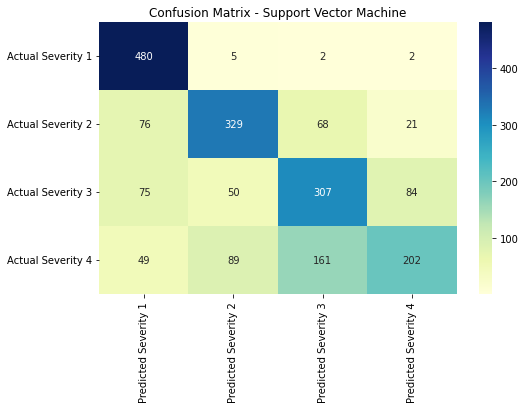

In [ ]:
y_pred = svc.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()

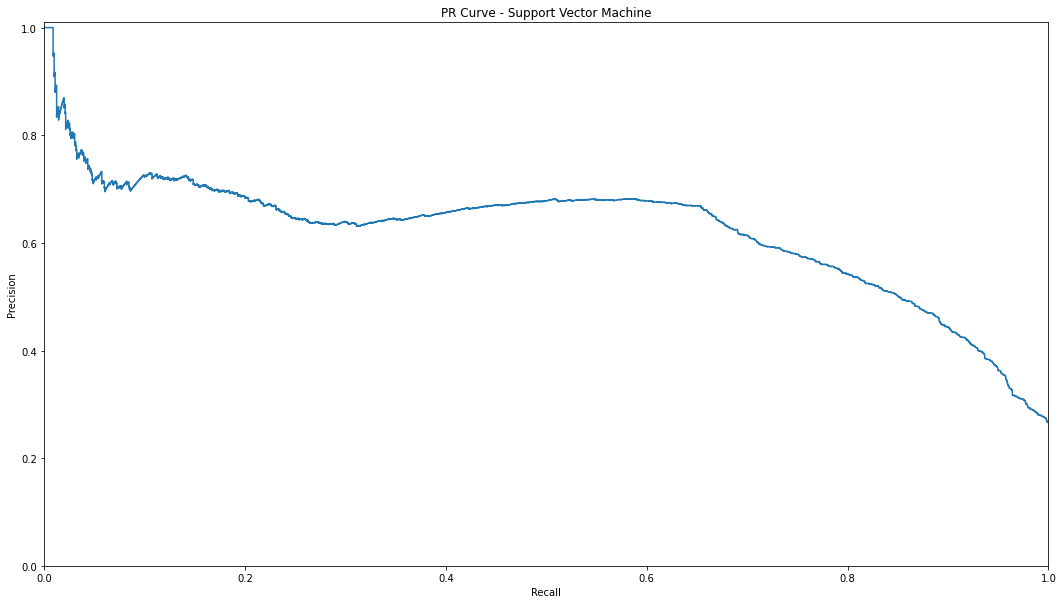

In [ ]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = svc.decision_function(X_validate)

precision["SVM"], recall["SVM"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["SVM"], tpr["SVM"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["SVM"], precision["SVM"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Support Vector Machine")
plt.show()

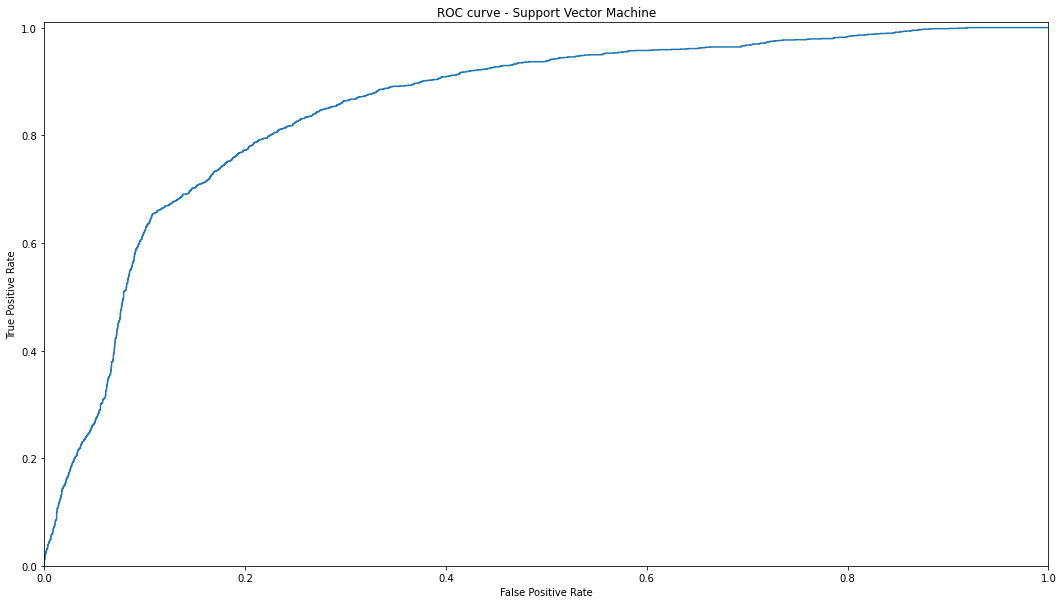

In [ ]:
plt.figure(figsize=(18, 10))
plt.step(fpr["SVM"], tpr["SVM"], where="post")

plt.title("ROC curve - Support Vector Machine")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

<a id="4.3"></a>
## 4.3 Decision Tree

In [ ]:
sample = X
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(58986, 60) (58986,)
(19663, 60) (19663,)


In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
parameters = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(dtc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters scores:
{'criterion': 'gini', 'max_depth': 10}
Train score: 0.7699115044247787
Validation score: 0.7484107206428318


In [ ]:
print("Default scores:")
dtc.fit(X_train, y_train)
print("Train score:", dtc.score(X_train, y_train))
print("Validation score:", dtc.score(X_validate, y_validate))

Default scores:
Train score: 0.9999491404740107
Validation score: 0.7052840360067131


In [ ]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.856650,0.014033,0.010618,0.000234,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.743431,0.748580,0.741375,0.744003,0.740442,0.743566,0.002825,1
5,1.114538,0.015609,0.011175,0.001591,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.738261,0.748072,0.745444,0.741884,0.743325,0.743397,0.003308,2
6,1.611602,0.014874,0.012305,0.000536,entropy,15,"{'criterion': 'entropy', 'max_depth': 15}",0.735379,0.750275,0.735356,0.738832,0.740866,0.740142,0.005487,3
2,1.182359,0.022884,0.012558,0.000358,gini,15,"{'criterion': 'gini', 'max_depth': 15}",0.740634,0.743494,0.736035,0.734848,0.735356,0.738073,0.003402,4
7,1.886570,0.191196,0.012796,0.001931,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.700797,0.710096,0.701789,0.702721,0.710943,0.705269,0.004338,5
3,1.470583,0.024129,0.013009,0.000416,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.701221,0.704671,0.711028,0.703738,0.703823,0.704896,0.003276,6
4,0.576690,0.009343,0.011163,0.002930,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.689439,0.694244,0.694668,0.690260,0.695516,0.692825,0.002478,7
0,0.455073,0.012990,0.010303,0.000690,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.689439,0.694160,0.693397,0.693651,0.689836,0.692096,0.002027,8


In [ ]:
y_pred = dtc.predict(X_validate)

accuracy["Decision Tree"] = accuracy_score(y_validate, y_pred)
f1["Decision Tree"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, dtc.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     14788
           2       1.00      1.00      1.00     14672
           3       1.00      1.00      1.00     14792
           4       1.00      1.00      1.00     14734

    accuracy                           1.00     58986
   macro avg       1.00      1.00      1.00     58986
weighted avg       1.00      1.00      1.00     58986

              precision    recall  f1-score   support

           1       0.90      0.90      0.90      4884
           2       0.72      0.71      0.72      4944
           3       0.61      0.62      0.61      4889
           4       0.59      0.60      0.59      4946

    accuracy                           0.71     19663
   macro avg       0.71      0.71      0.71     19663
weighted avg       0.71      0.71      0.71     19663



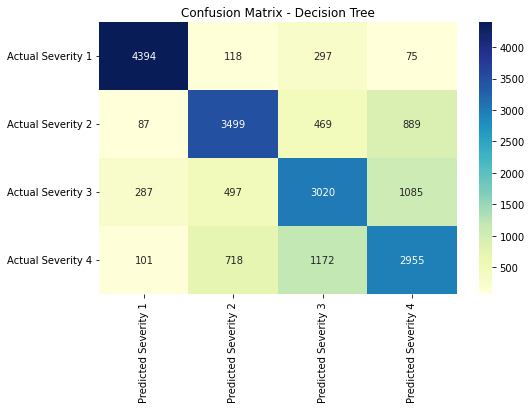

In [ ]:
y_pred = dtc.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

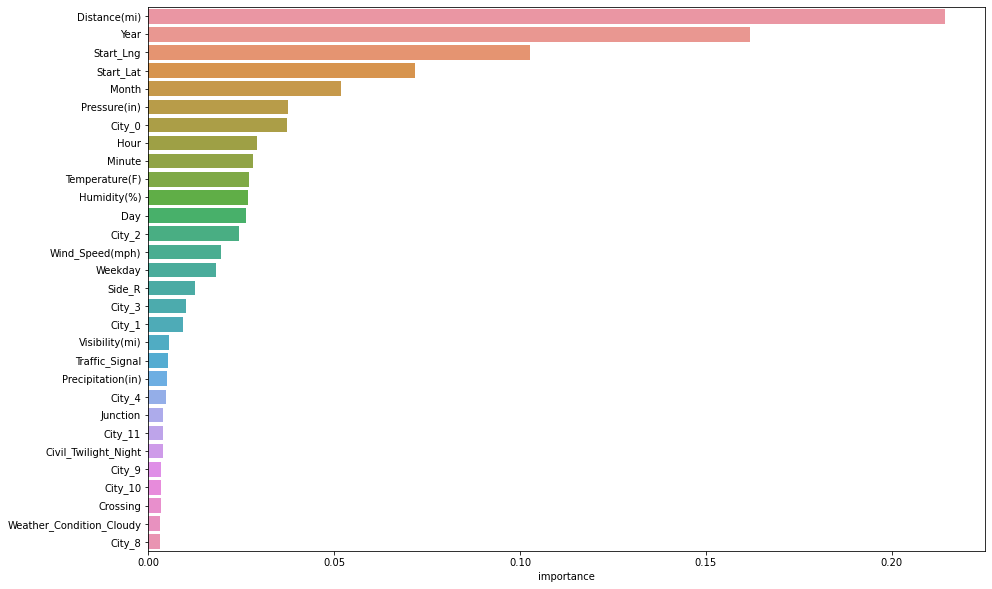

In [ ]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = dtc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

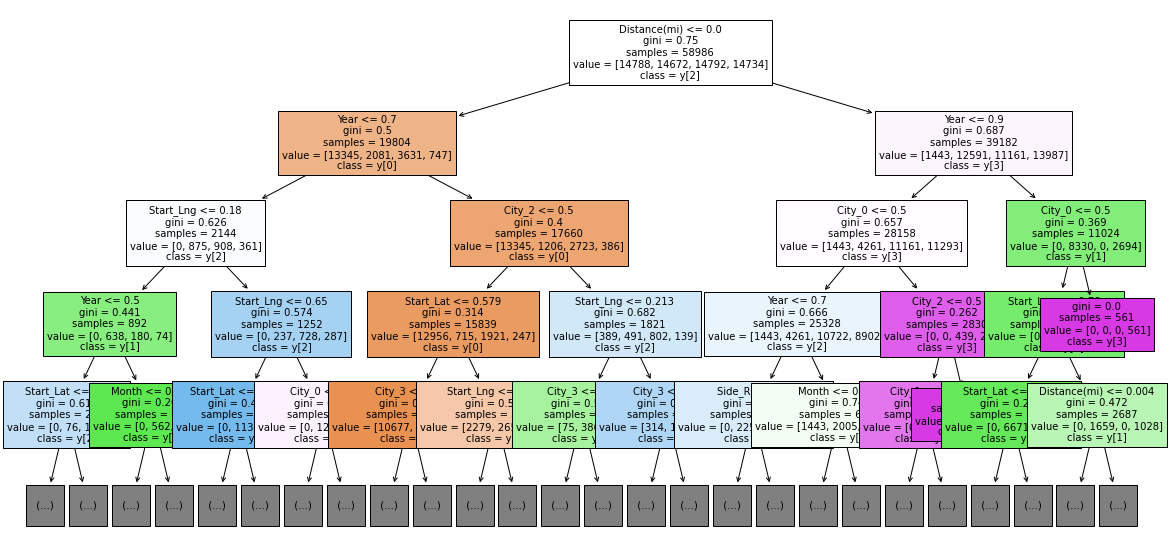

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(dtc, max_depth=4, fontsize=10, feature_names=X_train.columns.to_list(), class_names = True, filled=True)
plt.show()

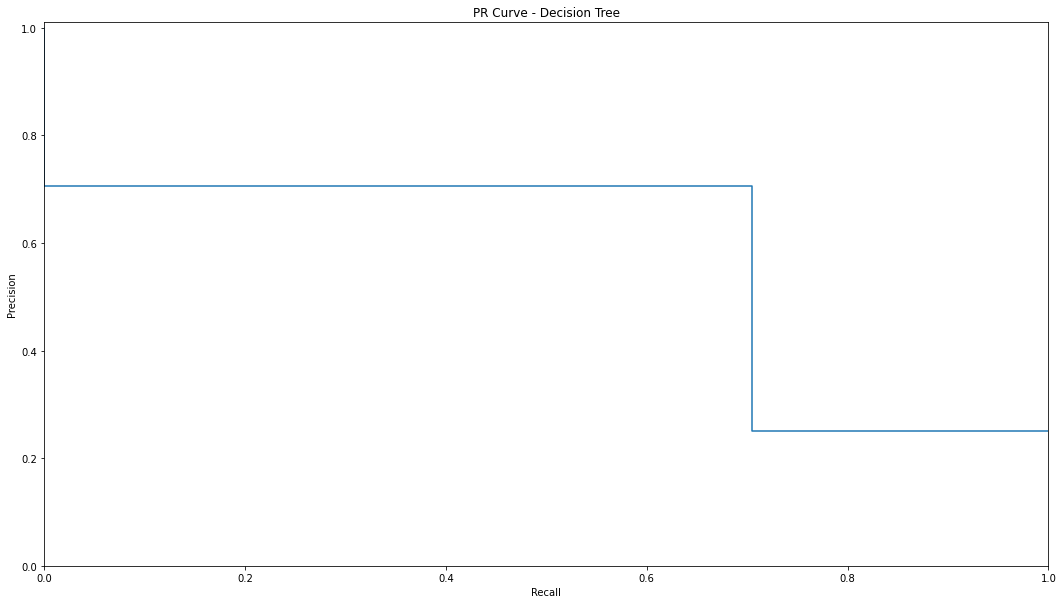

In [ ]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = dtc.predict_proba(X_validate)

precision["Decision Tree"], recall["Decision Tree"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Decision Tree"], tpr["Decision Tree"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Decision Tree"], precision["Decision Tree"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Decision Tree")
plt.show()

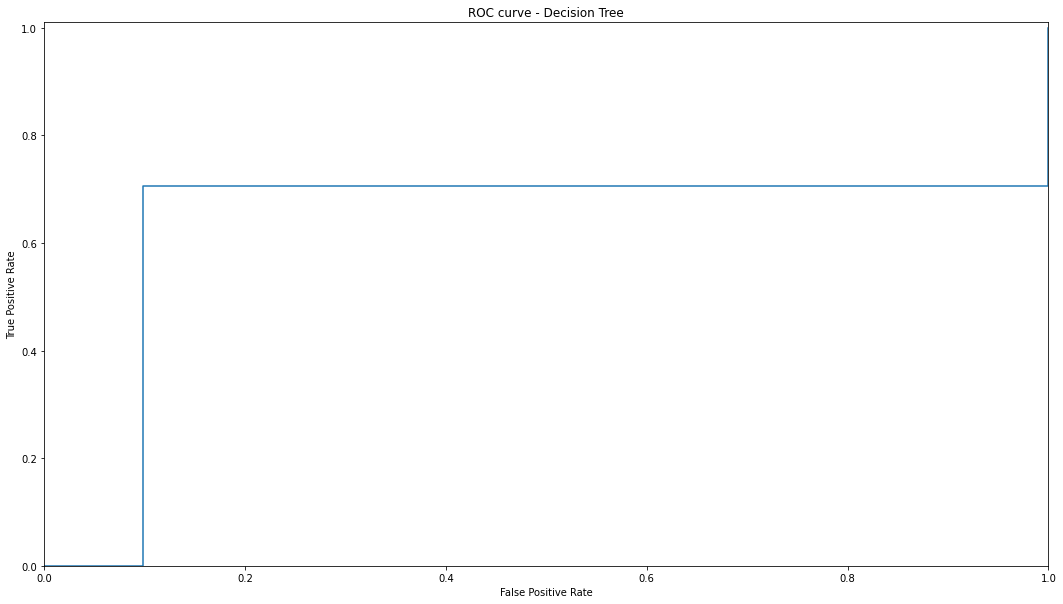

In [ ]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Decision Tree"], tpr["Decision Tree"], where="post")

plt.title("ROC curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

<a id="4.4"></a>
## 4.4 Random Forest

In [ ]:
sample = X
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(58986, 60) (58986,)
(19663, 60) (19663,)


In [ ]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
parameters = [{"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(rfc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Best parameters scores:
{'max_depth': 30, 'n_estimators': 500}
Train score: 0.9997457023700539
Validation score: 0.7890962721863398


In [ ]:
print("Default scores:")
rfc.fit(X_train, y_train)
print("Train score:", rfc.score(X_train, y_train))
print("Validation score:", rfc.score(X_validate, y_validate))

Default scores:
Train score: 0.9999491404740107
Validation score: 0.7836545796673956


In [ ]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,74.425853,12.187447,3.214353,0.754257,30,500,"{'max_depth': 30, 'n_estimators': 500}",0.770554,0.778842,0.778333,0.773417,0.779096,0.776049,0.003447,1
14,32.191710,0.275887,1.461699,0.041134,30,200,"{'max_depth': 30, 'n_estimators': 200}",0.771317,0.780537,0.777316,0.773926,0.774349,0.775489,0.003161,2
13,16.940668,1.016587,0.825691,0.038576,30,100,"{'max_depth': 30, 'n_estimators': 100}",0.764960,0.778588,0.774265,0.770450,0.768924,0.771437,0.004655,3
12,8.462958,0.150016,0.443431,0.004112,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.759790,0.774943,0.769518,0.767144,0.768331,0.767945,0.004873,4
11,64.076902,1.598773,2.875421,0.141402,15,500,"{'max_depth': 15, 'n_estimators': 500}",0.759281,0.769857,0.766466,0.762906,0.768500,0.765402,0.003854,5
10,26.579481,0.994044,1.431425,0.322123,15,200,"{'max_depth': 15, 'n_estimators': 200}",0.759705,0.766127,0.763414,0.761380,0.766212,0.763368,0.002572,6
9,13.315411,1.031441,0.662208,0.039235,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.756060,0.769687,0.764093,0.760956,0.765534,0.763266,0.004568,7
8,6.796078,0.231787,0.329840,0.011613,15,50,"{'max_depth': 15, 'n_estimators': 50}",0.754535,0.765195,0.761889,0.758498,0.763584,0.760740,0.003815,8
7,47.433383,3.296660,2.074727,0.160382,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.740804,0.747987,0.743664,0.741544,0.750106,0.744821,0.003638,9
6,18.178004,0.790969,0.949355,0.209136,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.739363,0.747224,0.743494,0.739934,0.750869,0.744177,0.004375,10


In [ ]:
y_pred = rfc.predict(X_validate)

accuracy["Random Forest"] = accuracy_score(y_validate, y_pred)
f1["Random Forest"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, rfc.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     14788
           2       1.00      1.00      1.00     14672
           3       1.00      1.00      1.00     14792
           4       1.00      1.00      1.00     14734

    accuracy                           1.00     58986
   macro avg       1.00      1.00      1.00     58986
weighted avg       1.00      1.00      1.00     58986

              precision    recall  f1-score   support

           1       0.89      0.97      0.93      4884
           2       0.82      0.80      0.81      4944
           3       0.67      0.75      0.71      4889
           4       0.75      0.62      0.68      4946

    accuracy                           0.78     19663
   macro avg       0.78      0.78      0.78     19663
weighted avg       0.78      0.78      0.78     19663



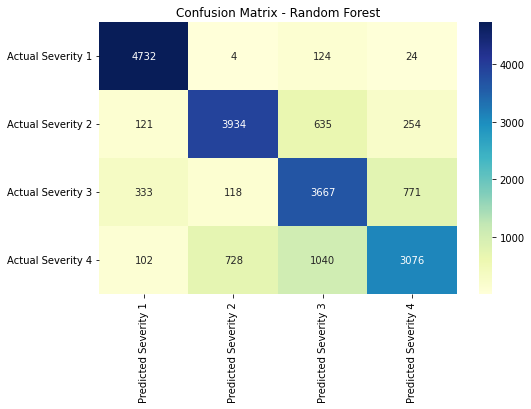

In [ ]:
y_pred = rfc.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

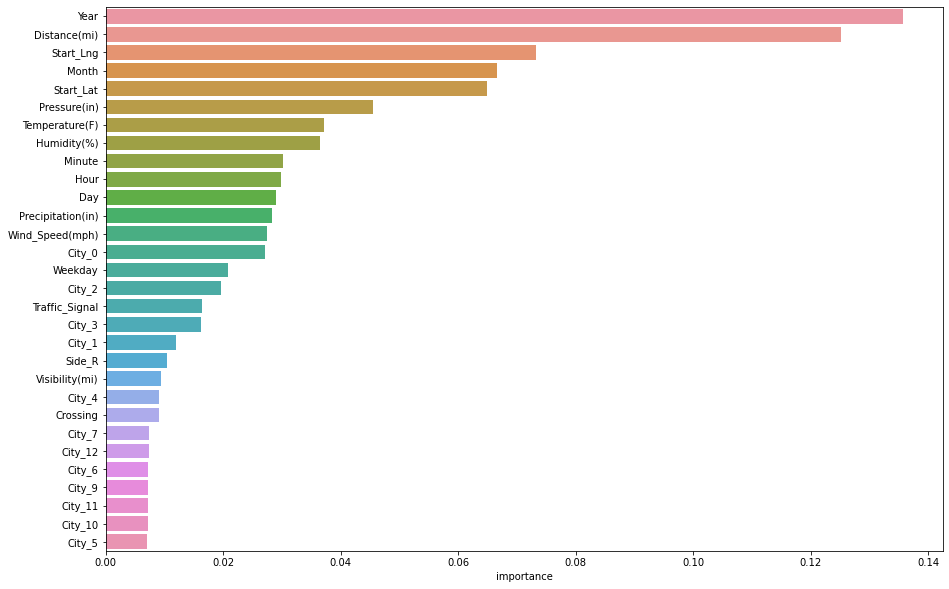

In [ ]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = rfc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

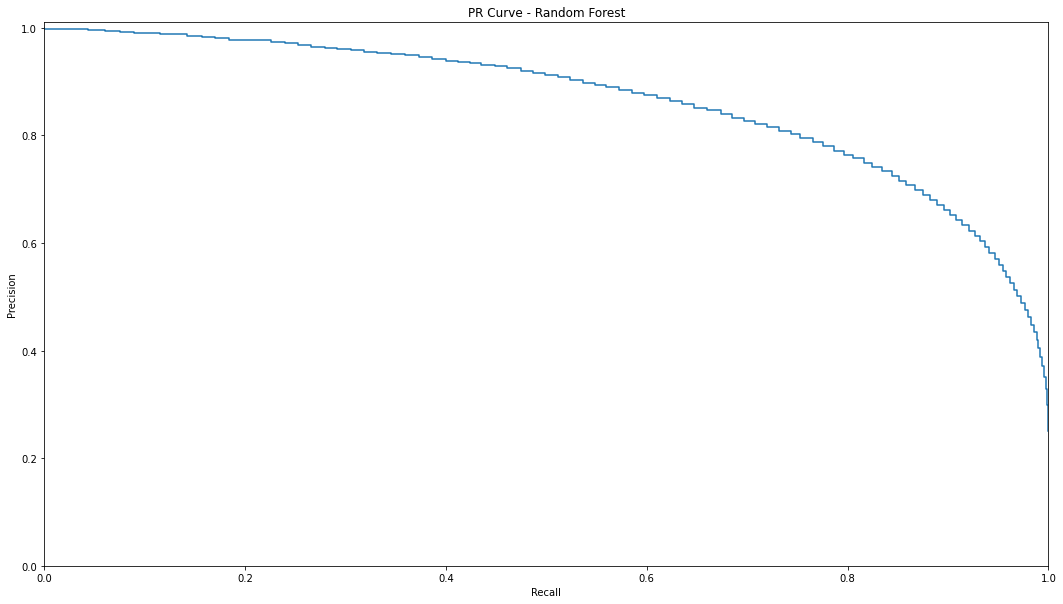

In [ ]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = rfc.predict_proba(X_validate)

precision["Random Forest"], recall["Random Forest"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Random Forest"], precision["Random Forest"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Random Forest")
plt.show()

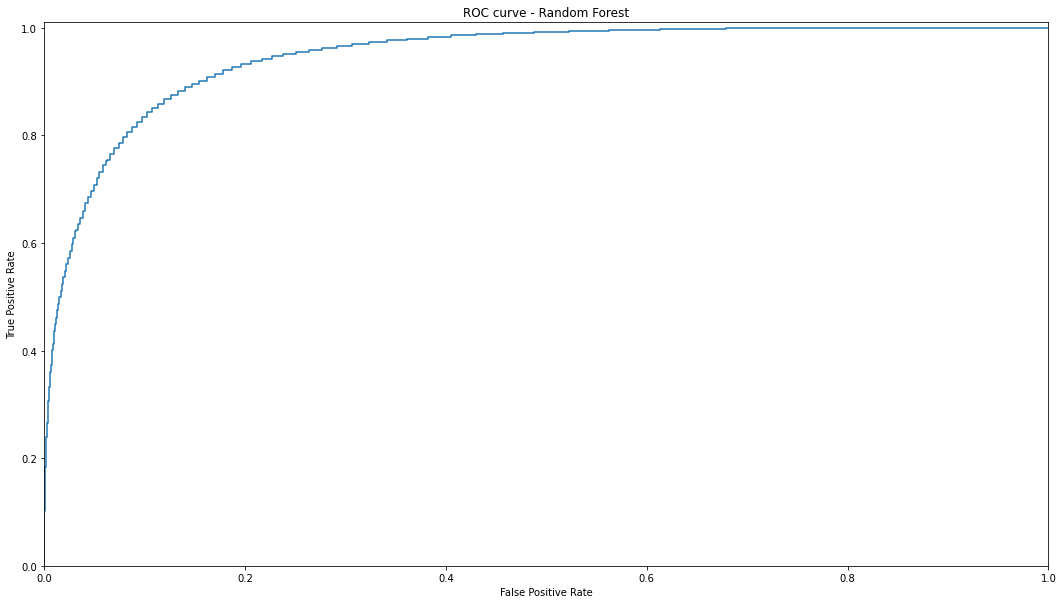

In [ ]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Random Forest"], tpr["Random Forest"], where="post")

plt.title("ROC curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

<a id="4.5"></a>
## 4.5 Naive Bayes


In [ ]:
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB
sample = X
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(58986, 60) (58986,)
(19663, 60) (19663,)


In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Train score:", gnb.score(X_train, y_train))
print("Validation score:", gnb.score(X_validate, y_validate))

Train score: 0.5365849523615773
Validation score: 0.538625845496618


In [ ]:
y_pred = gnb.predict(X_validate)

accuracy["Gaussian Naive Bayes"] = accuracy_score(y_validate, y_pred)
f1["Gaussian Naive Bayes"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, gnb.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.98      0.81     14788
           2       0.65      0.22      0.33     14672
           3       0.37      0.70      0.48     14792
           4       0.72      0.25      0.37     14734

    accuracy                           0.54     58986
   macro avg       0.61      0.54      0.50     58986
weighted avg       0.61      0.54      0.50     58986

              precision    recall  f1-score   support

           1       0.70      0.98      0.82      4884
           2       0.65      0.22      0.33      4944
           3       0.37      0.71      0.48      4889
           4       0.73      0.26      0.38      4946

    accuracy                           0.54     19663
   macro avg       0.61      0.54      0.50     19663
weighted avg       0.61      0.54      0.50     19663



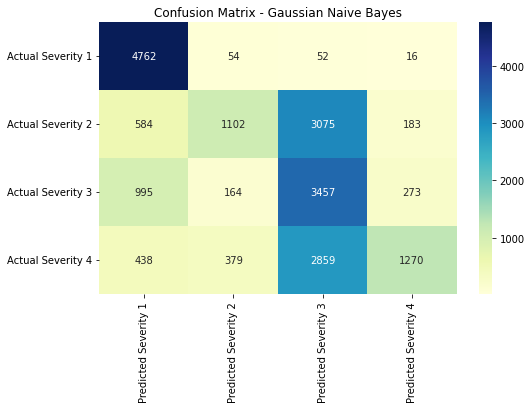

In [ ]:
y_pred = gnb.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()

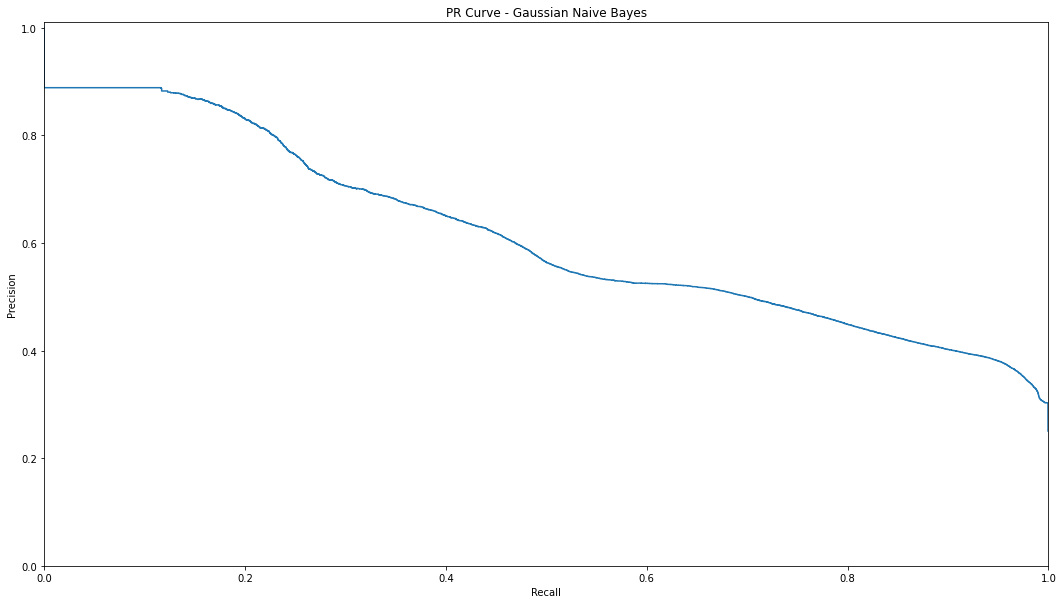

In [ ]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = gnb.predict_proba(X_validate)

precision["Gaussian Naive Bayes"], recall["Gaussian Naive Bayes"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Gaussian Naive Bayes"], tpr["Gaussian Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Gaussian Naive Bayes"], precision["Gaussian Naive Bayes"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Gaussian Naive Bayes")
plt.show()

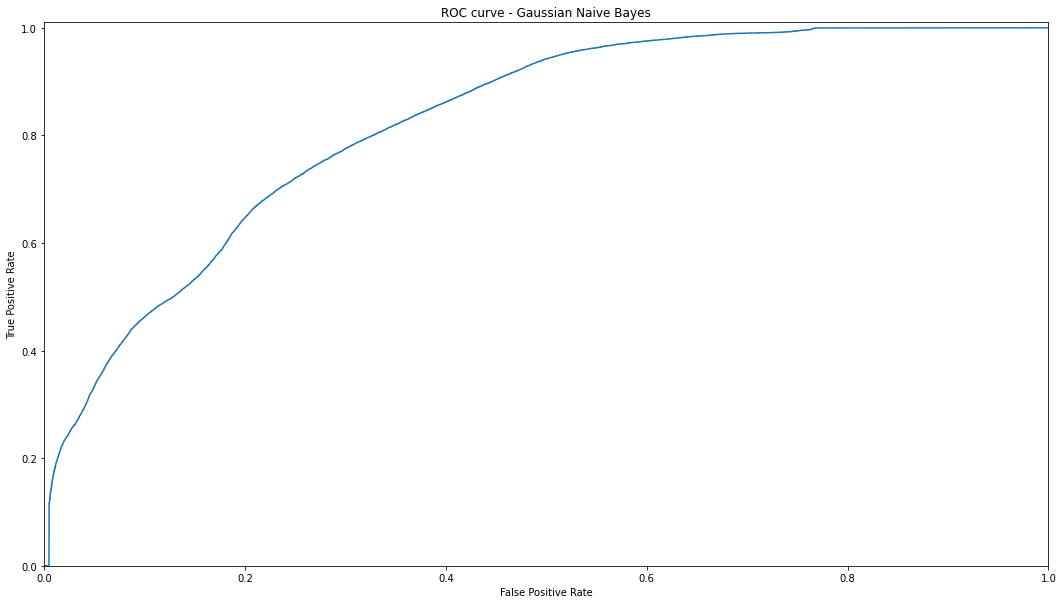

In [ ]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Gaussian Naive Bayes"], tpr["Gaussian Naive Bayes"], where="post")

plt.title("ROC curve - Gaussian Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

print("Train score:", mnb.score(X_train, y_train))
print("Validation score:", mnb.score(X_validate, y_validate))

Train score: 0.5284982877292917
Validation score: 0.5298784519147638


In [ ]:
y_pred = mnb.predict(X_validate)

accuracy["Multinomial Naive Bayes"] = accuracy_score(y_validate, y_pred)
f1["Multinomial Naive Bayes"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, mnb.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           1       0.59      0.72      0.65     14788
           2       0.50      0.52      0.51     14672
           3       0.44      0.46      0.45     14792
           4       0.58      0.41      0.48     14734

    accuracy                           0.53     58986
   macro avg       0.53      0.53      0.52     58986
weighted avg       0.53      0.53      0.52     58986

              precision    recall  f1-score   support

           1       0.59      0.71      0.65      4884
           2       0.51      0.52      0.52      4944
           3       0.44      0.47      0.46      4889
           4       0.59      0.42      0.49      4946

    accuracy                           0.53     19663
   macro avg       0.53      0.53      0.53     19663
weighted avg       0.53      0.53      0.53     19663



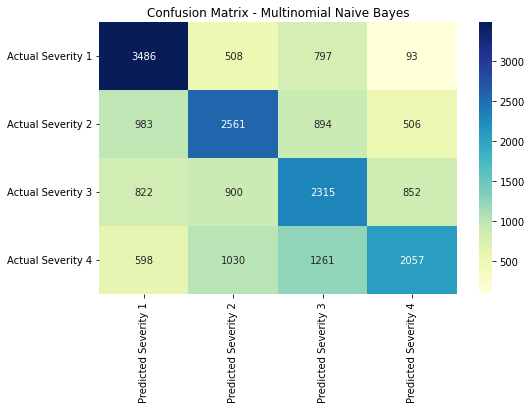

In [ ]:
y_pred = mnb.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.show()

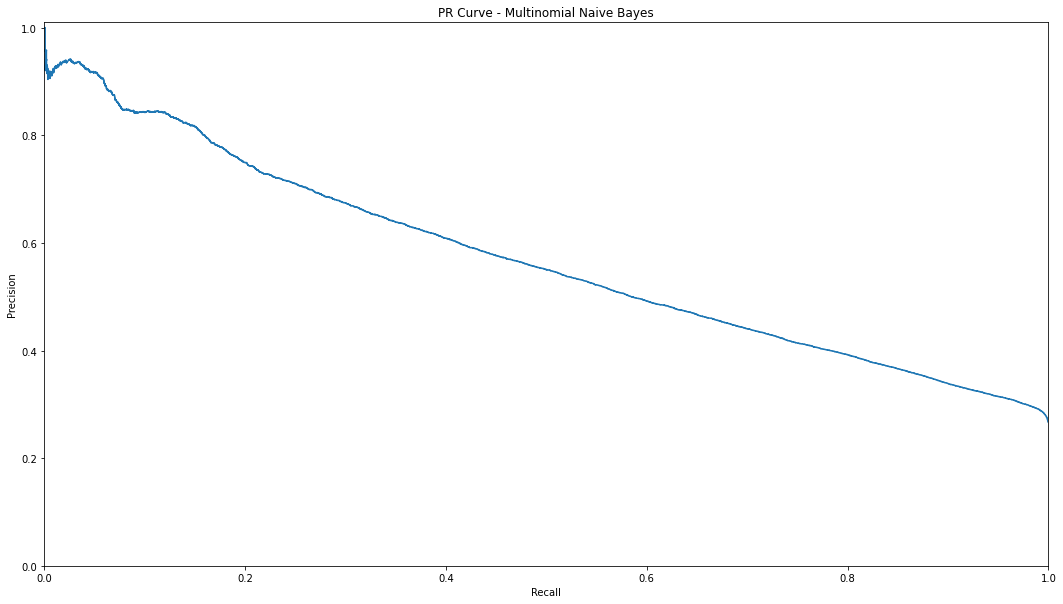

In [ ]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = mnb.predict_proba(X_validate)

precision["Multinomial Naive Bayes"], recall["Multinomial Naive Bayes"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Multinomial Naive Bayes"], tpr["Multinomial Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Multinomial Naive Bayes"], precision["Multinomial Naive Bayes"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Multinomial Naive Bayes")
plt.show()

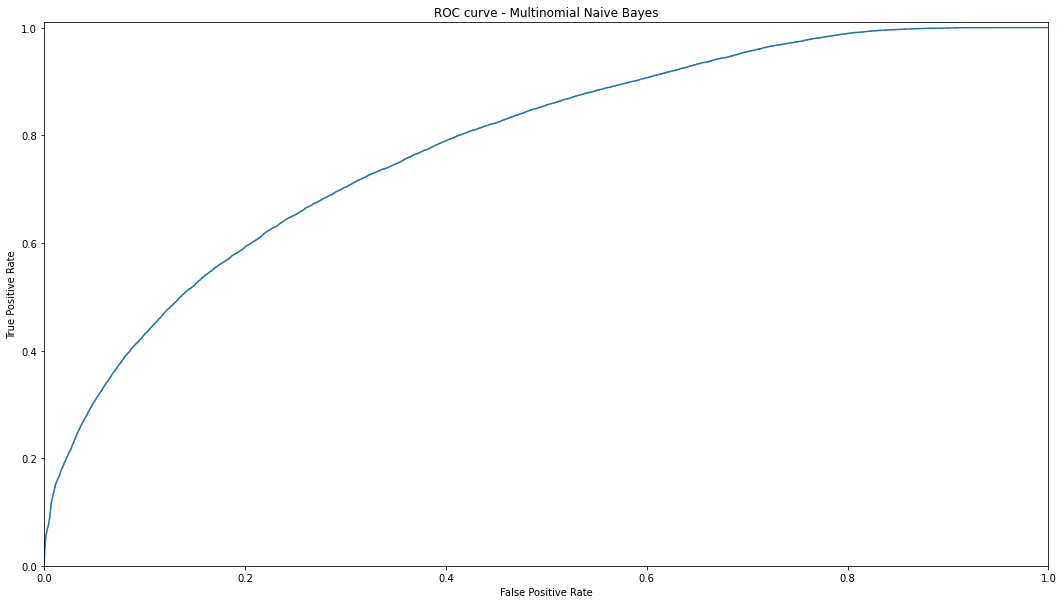

In [ ]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Multinomial Naive Bayes"], tpr["Multinomial Naive Bayes"], where="post")

plt.title("ROC curve - Multinomial Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

print("Train score:", bnb.score(X_train, y_train))
print("Validation score:", bnb.score(X_validate, y_validate))

Train score: 0.5945648119892856
Validation score: 0.5979250368712811


In [ ]:
y_pred = bnb.predict(X_validate)

accuracy["Bernoulli Naive Bayes"] = accuracy_score(y_validate, y_pred)
f1["Bernoulli Naive Bayes"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, mnb.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           1       0.59      0.72      0.65     14788
           2       0.50      0.52      0.51     14672
           3       0.44      0.46      0.45     14792
           4       0.58      0.41      0.48     14734

    accuracy                           0.53     58986
   macro avg       0.53      0.53      0.52     58986
weighted avg       0.53      0.53      0.52     58986

              precision    recall  f1-score   support

           1       0.77      0.82      0.79      4884
           2       0.53      0.62      0.57      4944
           3       0.50      0.51      0.50      4889
           4       0.61      0.45      0.52      4946

    accuracy                           0.60     19663
   macro avg       0.60      0.60      0.59     19663
weighted avg       0.60      0.60      0.59     19663



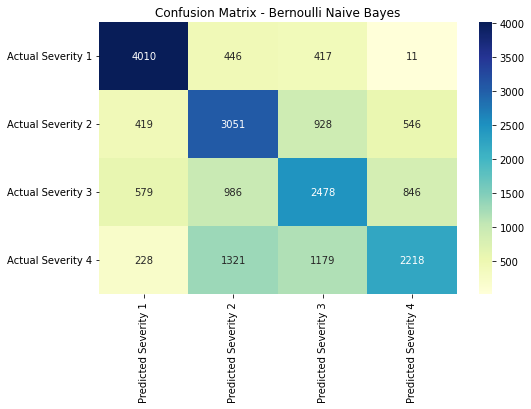

In [ ]:
y_pred = bnb.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Bernoulli Naive Bayes")
plt.show()

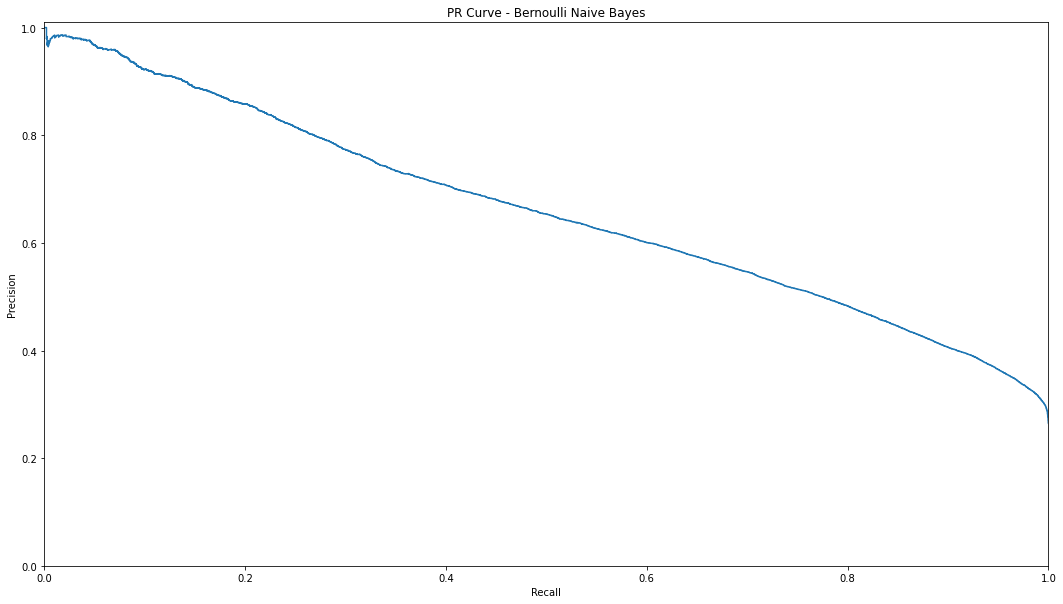

In [ ]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = bnb.predict_proba(X_validate)

precision["Bernoulli Naive Bayes"], recall["Bernoulli Naive Bayes"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Bernoulli Naive Bayes"], tpr["Bernoulli Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Bernoulli Naive Bayes"], precision["Bernoulli Naive Bayes"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Bernoulli Naive Bayes")
plt.show()

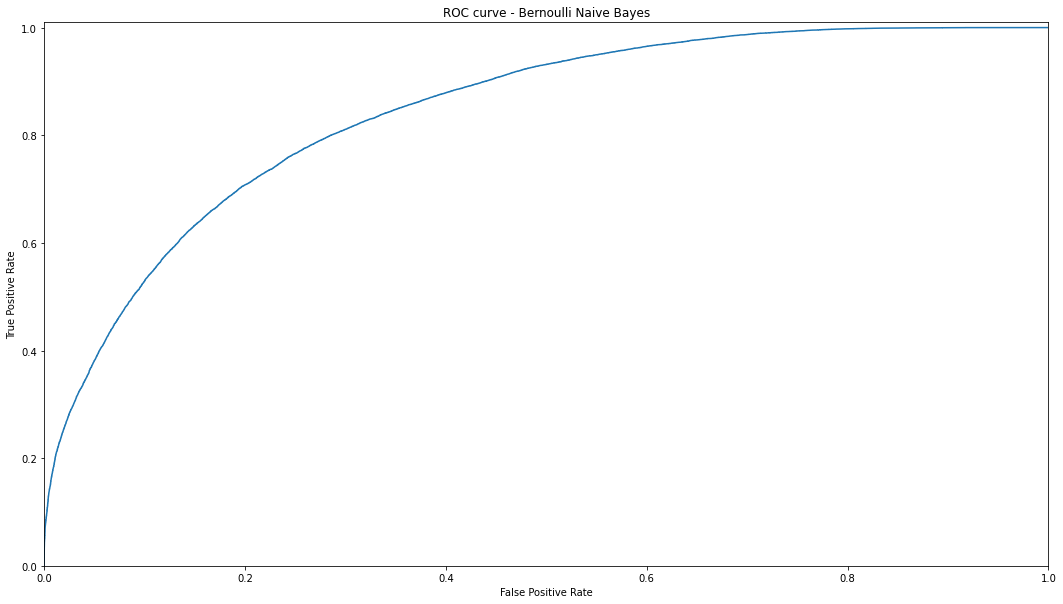

In [ ]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Bernoulli Naive Bayes"], tpr["Bernoulli Naive Bayes"], where="post")

plt.title("ROC curve - Bernoulli Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

<a id="4.6"></a>
## 4.6 Multi-layer Perceptron

In [ ]:
sample = X
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(58986, 60) (58986,)
(19663, 60) (19663,)


In [ ]:
mlp = MLPClassifier(random_state=42, verbose=False)
parameters = [{"hidden_layer_sizes": [(64, 32), (32, 64, 32)], "max_iter": [200], "solver": ["sgd", "adam"], "activation": ["tanh", "relu"]}]
grid = GridSearchCV(mlp, parameters, verbose=5, n_jobs=-1)

sample = X.sample(10_000, random_state=42)
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)
grid.fit(X_sample, y_sample)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Best parameters scores:
{'activation': 'tanh', 'hidden_layer_sizes': (32, 64, 32), 'max_iter': 200, 'solver': 'adam'}
Train score: 0.6768894313904994
Validation score: 0.7551238366475106


In [ ]:
print("Default scores:")
mlp.fit(X_train, y_train)
print("Train score:", mlp.score(X_train, y_train))
print("Validation score:", mlp.score(X_validate, y_validate))

Default scores:


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Train score: 0.7760316007188146
Validation score: 0.7342724914814627


In [ ]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,30.932051,0.963623,0.021981,0.000902,tanh,"(32, 64, 32)",200,adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.6440,0.6500,0.6795,0.6920,0.6700,0.6671,0.017934,1
1,24.892305,0.268977,0.020719,0.005295,tanh,"(64, 32)",200,adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.6730,0.6500,0.6785,0.6735,0.6545,0.6659,0.011399,2
6,22.663491,0.367713,0.011675,0.000414,relu,"(32, 64, 32)",200,sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.6635,0.6660,0.6675,0.6675,0.6560,0.6641,0.004306,3
2,28.555812,0.786539,0.020058,0.000243,tanh,"(32, 64, 32)",200,sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.6640,0.6625,0.6650,0.6675,0.6540,0.6626,0.004598,4
4,18.673943,0.312669,0.010749,0.000218,relu,"(64, 32)",200,sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.6480,0.6495,0.6565,0.6595,0.6460,0.6519,0.005190,5
7,22.861949,2.393000,0.010594,0.001674,relu,"(32, 64, 32)",200,adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.6530,0.6480,0.6405,0.6465,0.6435,0.6463,0.004226,6
5,23.283657,3.728951,0.010675,0.000194,relu,"(64, 32)",200,adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.6385,0.6495,0.6480,0.6525,0.6400,0.6457,0.005483,7
0,24.098605,0.903579,0.018460,0.002103,tanh,"(64, 32)",200,sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.6430,0.6315,0.6470,0.6545,0.6410,0.6434,0.007533,8


In [ ]:
y_pred = mlp.predict(X_validate)

accuracy["Multi Layer Perceptron"] = accuracy_score(y_validate, y_pred)
f1["Multi Layer Perceptron"] = f1_score(y_validate, y_pred, average="macro")

print(classification_report(y_train, mlp.predict(X_train)))
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.96      0.92     14788
           2       0.81      0.79      0.80     14672
           3       0.66      0.78      0.71     14792
           4       0.77      0.57      0.66     14734

    accuracy                           0.78     58986
   macro avg       0.78      0.78      0.77     58986
weighted avg       0.78      0.78      0.77     58986

              precision    recall  f1-score   support

           1       0.86      0.95      0.90      4884
           2       0.78      0.76      0.77      4944
           3       0.60      0.72      0.66      4889
           4       0.69      0.51      0.59      4946

    accuracy                           0.73     19663
   macro avg       0.73      0.73      0.73     19663
weighted avg       0.73      0.73      0.73     19663



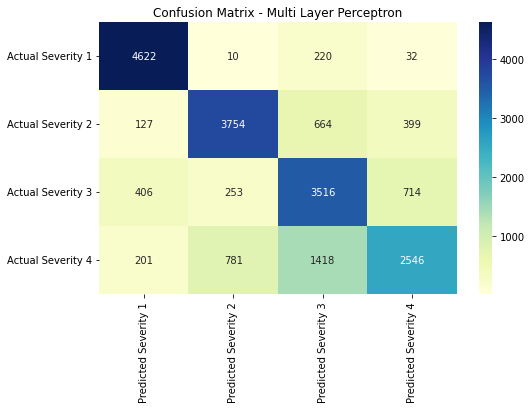

In [ ]:
y_pred = mlp.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Multi Layer Perceptron")
plt.show()

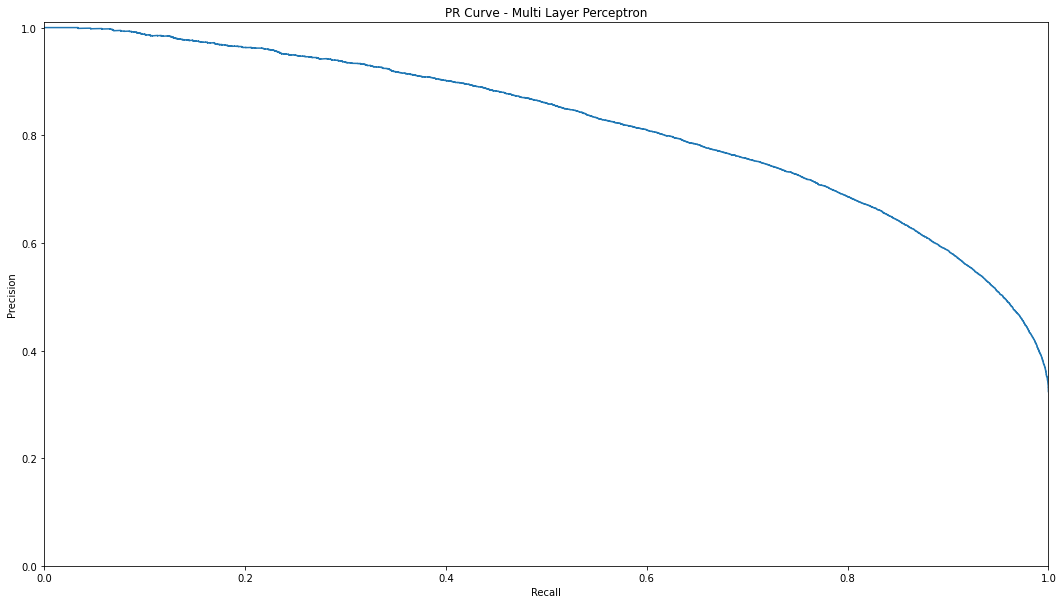

In [ ]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = mlp.predict_proba(X_validate)

precision["Multi Layer Perceptron"], recall["Multi Layer Perceptron"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Multi Layer Perceptron"], tpr["Multi Layer Perceptron"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Multi Layer Perceptron"], precision["Multi Layer Perceptron"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Multi Layer Perceptron")
plt.show()

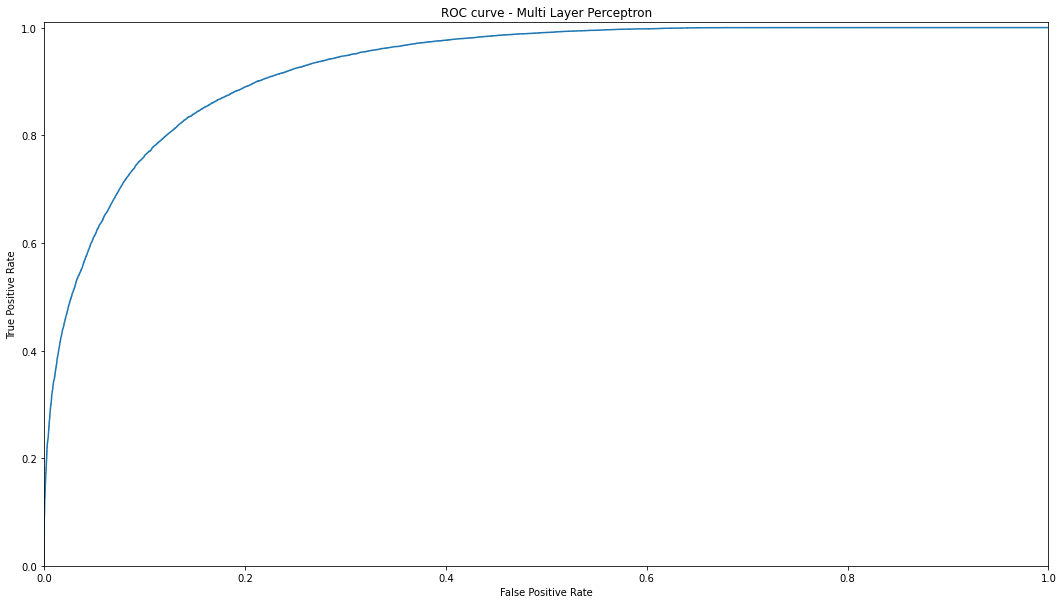

In [ ]:
plt.figure(figsize=(18, 10))
plt.step(fpr["Multi Layer Perceptron"], tpr["Multi Layer Perceptron"], where="post")

plt.title("ROC curve - Multi Layer Perceptron")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

<a id="5"></a>
##  Result

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



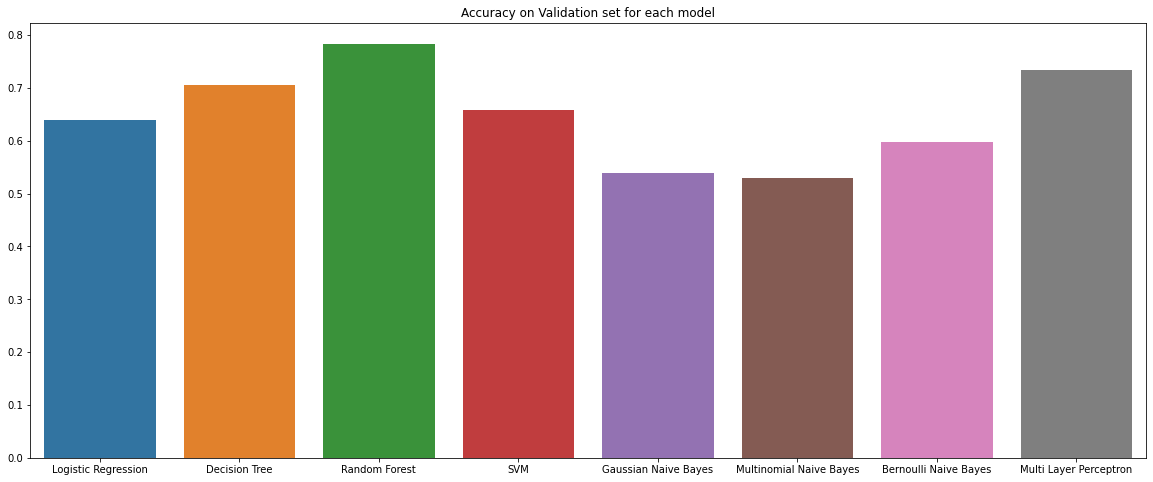

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("Accuracy on Validation set for each model")
sns.barplot(list(range(len(accuracy))), list(accuracy.values()))
plt.xticks(range(len(accuracy)), labels=accuracy.keys())
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



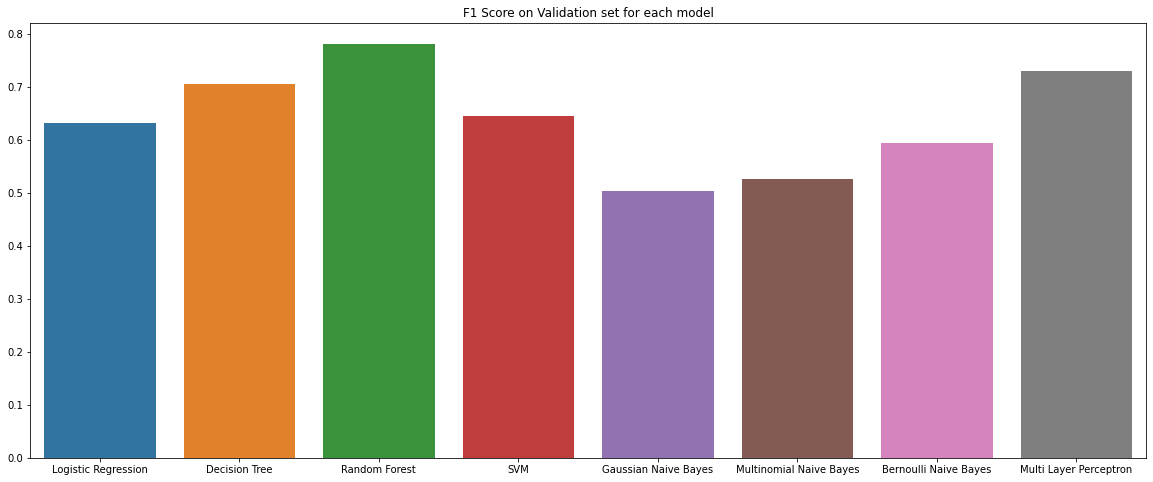

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("F1 Score on Validation set for each model")
sns.barplot(list(range(len(f1))), list(f1.values()))
plt.xticks(range(len(f1)), labels=f1.keys())
plt.show()

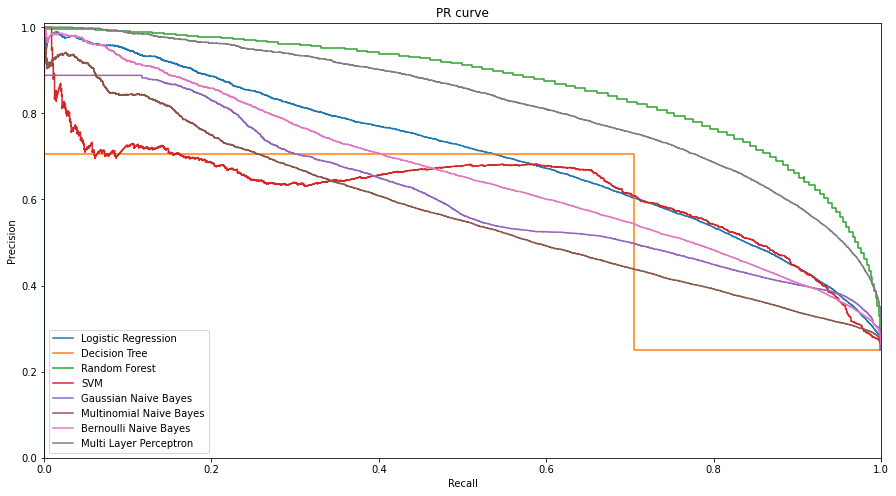

In [ ]:
plt.figure(figsize=(15, 8))
for key in f1.keys():
    plt.step(recall[key], precision[key], where="post", label=key)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR curve")
plt.legend()
plt.show()

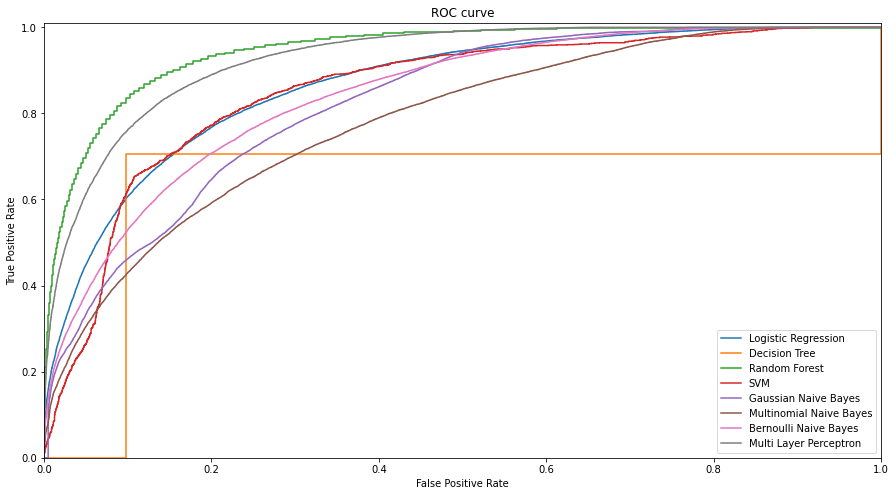

In [ ]:
plt.figure(figsize=(15, 8))
for key in f1.keys():
    plt.step(fpr[key], tpr[key], where="post", label=key)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("ROC curve")
plt.legend()
plt.show()

              precision    recall  f1-score   support

           1       0.89      0.97      0.93      4906
           2       0.81      0.79      0.80      4962
           3       0.67      0.75      0.71      4897
           4       0.74      0.61      0.67      4898

    accuracy                           0.78     19663
   macro avg       0.78      0.78      0.78     19663
weighted avg       0.78      0.78      0.78     19663



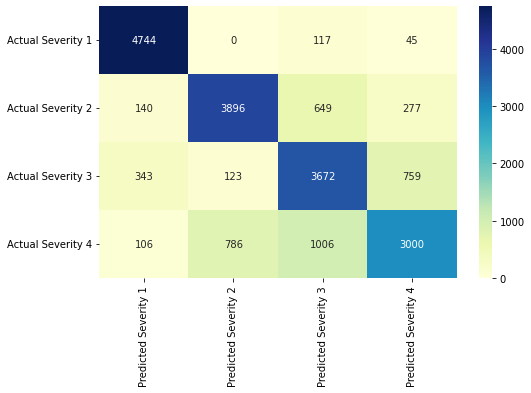

In [ ]:
sample = X_test
y_test_sample = sample["Severity"]
X_test_sample = sample.drop("Severity", axis=1)

y_pred = rfc.predict(X_test_sample)

print(classification_report(y_test_sample, y_pred))

confmat = confusion_matrix(y_true=y_test_sample, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.show()